In [1]:
from google.colab import files
uploaded = files.upload()

Saving Marketing Project-Flight data.csv to Marketing Project-Flight data.csv
Saving Marketing Project-Survey data.csv to Marketing Project-Survey data.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") 

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV

# Objectives and Intro

This is the dilemma of a reputed US airline carrier ‘Falcon airlines’. They aim to determine the relative importance of each parameter with regards to their contribution to passenger satisfaction. Provided is a random sample of 90917 individuals who travelled using their flights. The on-time performance of the flights along with the passengers’ information is published in the csv file named ‘Flight data’.  These passengers were asked to provide their feedback at the end of their flights on various parameters along with their overall experience. These collected details are made available in the survey report csv labelled ‘Survey data’.
In the survey, the passengers were explicitly asked whether they were satisfied with their overall flight experience and that is captured in the data of survey report under the variable labelled ‘Satisfaction’. 
The two objective of this project are-

1. To understand which parameters play an important role in swaying a passenger feedback towards ‘satisfied’. 
2. To predict whether a passenger will be satisfied or not given the rest of the details are provided.

# Capstone Notes 1 Objectives
Below are the guidelines for the Project Notes-I:

1. Introduction: Define the problem statement, need of the present study, and business/social opportunity

2. Data Report:
Understand how data was collected in terms of time, frequency, methodology
Visual inspection of data (rows, columns, descriptive details)
Understanding of attributes (variable info, renaming if required)

3. Initial Exploratory Data Analysis
Univariate analysis (distribution and spread for every continuous attribute, distribution of the data in categories for categorical ones)
Bivariate analysis (relationship between different variables, correlations)

In [3]:
df_flight=pd.read_csv('Marketing Project-Flight data.csv')
df_survey=pd.read_csv('Marketing Project-Survey data.csv')

In [4]:
df_flight.shape

(90917, 9)

In [5]:
df_flight.head()


,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0


In [6]:
df_survey.shape

(90917, 16)

In [7]:
df_survey.head()

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


# Data Pre-processing

In [8]:
df_flight.dtypes

CustomerID                 int64
Gender                    object
CustomerType              object
Age                        int64
TypeTravel                object
Class                     object
Flight_Distance            int64
DepartureDelayin_Mins      int64
ArrivalDelayin_Mins      float64
dtype: object

In [9]:
#Change object to category data type, also want to have arrival delay as an integer (throws an error because of nan's)
df_flight["CustomerID"] = df_flight["CustomerID"].astype("category")
df_flight["Gender"] = df_flight["Gender"].astype("category")
df_flight["CustomerType"] = df_flight["CustomerType"].astype("category")
df_flight["TypeTravel"] = df_flight["TypeTravel"].astype("category")
df_flight["Class"] = df_flight["Class"].astype("category")
df_flight["Gender"] = df_flight["Gender"].astype("category")
#df_flight["ArrivalDelayin_Mins"] = df_flight["ArrivalDelayin_Mins"].astype("int64")

In [10]:
df_flight.dtypes

CustomerID               category
Gender                   category
CustomerType             category
Age                         int64
TypeTravel               category
Class                    category
Flight_Distance             int64
DepartureDelayin_Mins       int64
ArrivalDelayin_Mins       float64
dtype: object

In [11]:

df_flight.isnull().sum()

CustomerID                  0
Gender                      0
CustomerType             9099
Age                         0
TypeTravel               9088
Class                       0
Flight_Distance             0
DepartureDelayin_Mins       0
ArrivalDelayin_Mins       284
dtype: int64

In [12]:
df_flight[df_flight['ArrivalDelayin_Mins'].isnull()]

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
105,150070,Female,Loyal Customer,21,Personal Travel,Eco,4804,20,NaN
481,150446,Male,Loyal Customer,28,Personal Travel,Eco,1792,24,NaN
501,150466,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,NaN
558,150523,Male,NaN,9,Personal Travel,Eco,1668,0,NaN
802,150767,Male,Loyal Customer,23,Personal Travel,Eco,4650,0,NaN
...,...,...,...,...,...,...,...,...,...
89062,239027,Female,NaN,41,Business travel,Business,3793,23,NaN
89402,239367,Male,Loyal Customer,44,Business travel,Business,3431,70,NaN
89681,239646,Male,Loyal Customer,39,Business travel,Business,1595,0,NaN
90097,240062,Female,Loyal Customer,45,Business travel,Eco,871,100,NaN


In [13]:
df_survey.dtypes

CustomerId                            int64
Satisfaction                         object
Seat_comfort                         object
Departure.Arrival.time_convenient    object
Food_drink                           object
Gate_location                        object
Inflightwifi_service                 object
Inflight_entertainment               object
Online_support                       object
Ease_of_Onlinebooking                object
Onboard_service                      object
Leg_room_service                     object
Baggage_handling                     object
Checkin_service                      object
Cleanliness                          object
Online_boarding                      object
dtype: object

In [14]:
df_survey.head(1)

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement


In [15]:
df_survey.columns

Index(['CustomerId', 'Satisfaction', 'Seat_comfort',
       'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
       'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding'],
      dtype='object')

In [16]:
#Change datatypes to category from columns
for col in ['CustomerId', 'Satisfaction', 'Seat_comfort',
       'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
       'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding']:
    df_survey[col] = df_survey[col].astype('category')


In [17]:
df_survey.columns

Index(['CustomerId', 'Satisfaction', 'Seat_comfort',
       'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
       'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding'],
      dtype='object')

In [18]:
df_flight.columns

Index(['CustomerID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [19]:
#change column names to match so that I can merge the dataframes
df_flight = df_flight.rename(columns={'CustomerID': 'CustomerId'})


In [20]:
df_flight.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [21]:
#merged two data frames based on a column column 'CustomerId'
df=pd.merge(df_flight, df_survey, on="CustomerId")

In [22]:
df.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [23]:
df.shape

(90917, 24)

In [24]:
df.tail(25)

,CustomerId,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
90892,240857,Female,disloyal Customer,54,Personal Travel,Eco,2928,41,41.0,neutral or dissatisfied,acceptable,excellent,acceptable,Inconvinient,poor,acceptable,poor,poor,good,need improvement,poor,need improvement,poor,poor
90893,240858,Female,disloyal Customer,7,Personal Travel,Eco,1616,0,15.0,neutral or dissatisfied,acceptable,excellent,acceptable,Inconvinient,acceptable,acceptable,good,acceptable,NaN,poor,good,acceptable,poor,acceptable
90894,240859,Female,disloyal Customer,20,Personal Travel,Business,2946,8,37.0,neutral or dissatisfied,acceptable,excellent,NaN,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,acceptable,excellent,acceptable,excellent,acceptable
90895,240860,Female,disloyal Customer,51,Personal Travel,Eco,2271,2,20.0,neutral or dissatisfied,acceptable,NaN,acceptable,need improvement,excellent,acceptable,excellent,excellent,excellent,need improvement,excellent,acceptable,good,excellent
90896,240861,Female,disloyal Customer,32,Personal Travel,Eco,2063,27,26.0,neutral or dissatisfied,acceptable,NaN,acceptable,manageable,need improvement,acceptable,need improvement,need improvement,good,acceptable,good,acceptable,good,need improvement
90897,240862,Female,disloyal Customer,68,Personal Travel,Eco,2375,0,0.0,neutral or dissatisfied,acceptable,excellent,acceptable,manageable,excellent,acceptable,excellent,excellent,good,good,good,good,excellent,excellent
90898,240863,Female,disloyal Customer,21,Personal Travel,Eco,1267,0,0.0,neutral or dissatisfied,acceptable,excellent,acceptable,manageable,poor,acceptable,poor,poor,excellent,need improvement,excellent,excellent,good,poor
90899,240864,Female,disloyal Customer,63,Personal Travel,Eco,1303,0,0.0,neutral or dissatisfied,acceptable,excellent,acceptable,manageable,excellent,acceptable,poor,excellent,acceptable,good,excellent,acceptable,good,excellent
90900,240865,Female,disloyal Customer,14,Personal Travel,Business,1966,0,0.0,neutral or dissatisfied,acceptable,excellent,acceptable,Convinient,poor,acceptable,poor,poor,excellent,excellent,good,good,good,poor
90901,240866,Female,disloyal Customer,14,Personal Travel,Eco,1972,0,0.0,neutral or dissatisfied,acceptable,excellent,NaN,very convinient,excellent,acceptable,excellent,excellent,acceptable,good,excellent,good,good,excellent


## Now dataframes are merged into one master dataframe

In [25]:
df.isnull().sum()

CustomerId                              0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                   

## There are many null values. Approximately 37283 customers of the 90,000 are missing data.


In [26]:
df.isnull().any(axis=1).sum()

37283

In [27]:
df.Satisfaction.value_counts()

satisfied                  49761
neutral or dissatisfied    41156
Name: Satisfaction, dtype: int64

In [28]:
df['Departure.Arrival.time_convenient'].value_counts()

good                18840
excellent           17079
acceptable          14806
need improvement    14539
poor                13210
extremely poor       4199
Name: Departure.Arrival.time_convenient, dtype: int64

In [29]:
df_no_nan = df.dropna()

In [30]:
df_no_nan.shape

(53634, 24)

In [31]:
df.shape

(90917, 24)

## Unfortunately, the missing values dont seem to be in the same customer entries. I will most likely drop these categories prior to modelling as removing the customer entries would remove too much data. I'll need to put more thought into this.


#EDA 


## Categorical Data

In [32]:
df.set_index('CustomerId')

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
CustomerId,,,,,,,,,,,,,,,,,,,,,,,
149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240877,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,0.0,satisfied,excellent,excellent,excellent,need improvement,need improvement,excellent,need improvement,need improvement,acceptable,excellent,acceptable,excellent,good,need improvement
240878,Female,disloyal Customer,29,Personal Travel,Eco,1731,0,0.0,satisfied,excellent,excellent,excellent,manageable,need improvement,excellent,need improvement,need improvement,acceptable,acceptable,good,good,good,need improvement
240879,Male,disloyal Customer,69,Personal Travel,Eco,2320,155,163.0,neutral or dissatisfied,acceptable,NaN,acceptable,manageable,acceptable,need improvement,need improvement,good,good,acceptable,good,need improvement,acceptable,need improvement


In [33]:
categories=df.select_dtypes(include=['category'])

In [34]:
categories.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'TypeTravel', 'Class',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [35]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

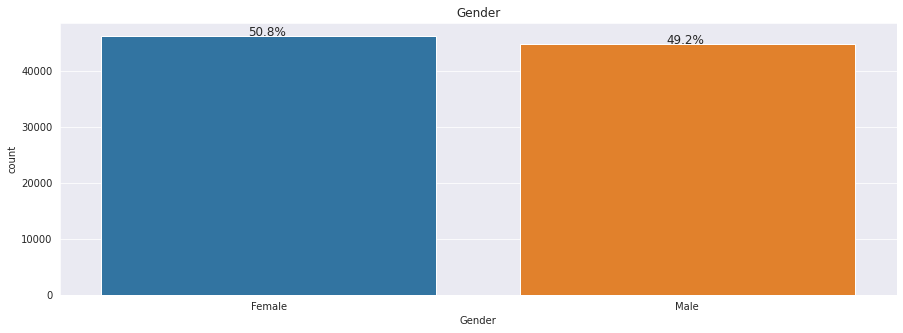

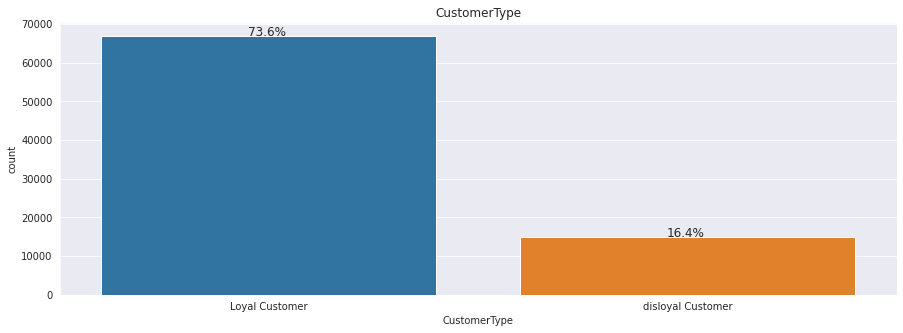

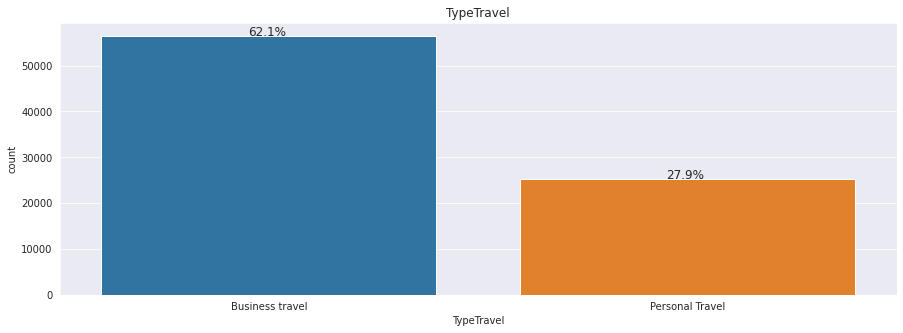

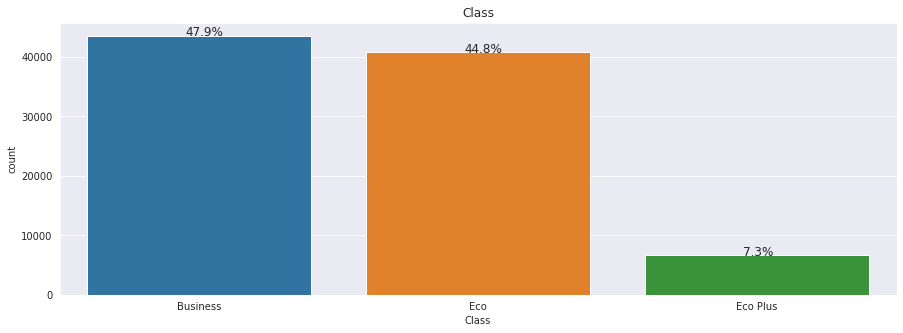

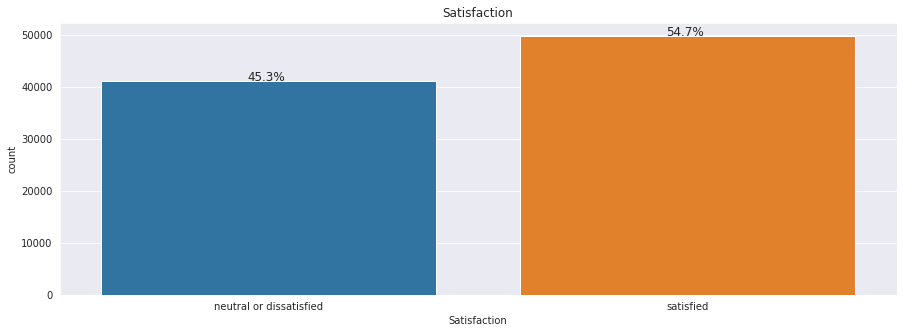

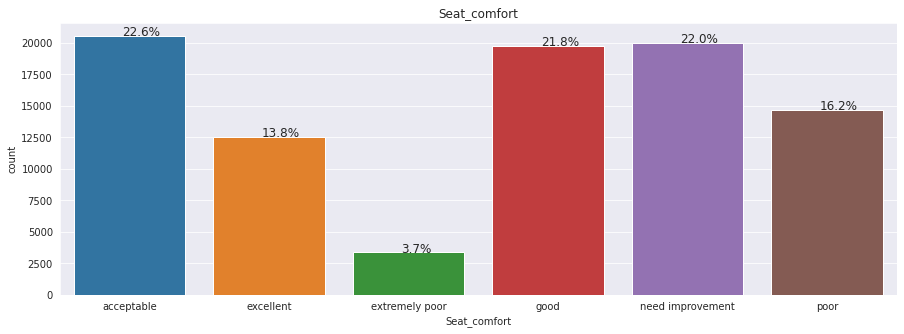

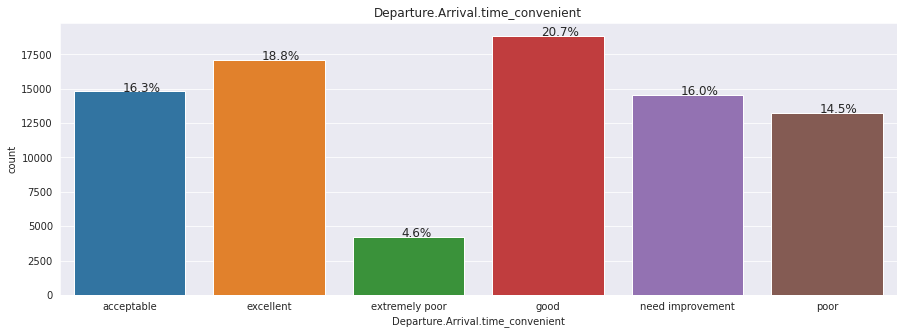

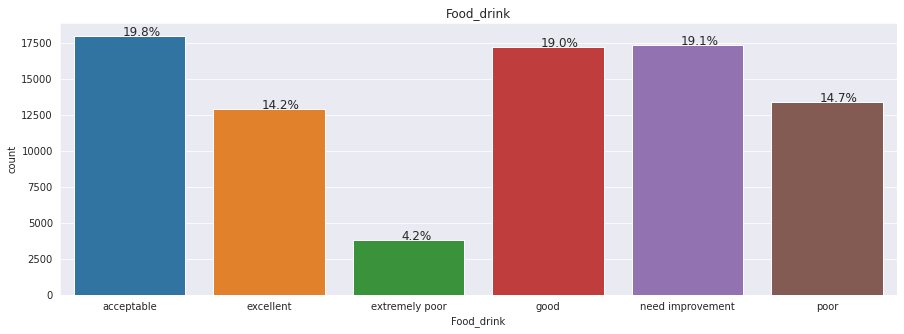

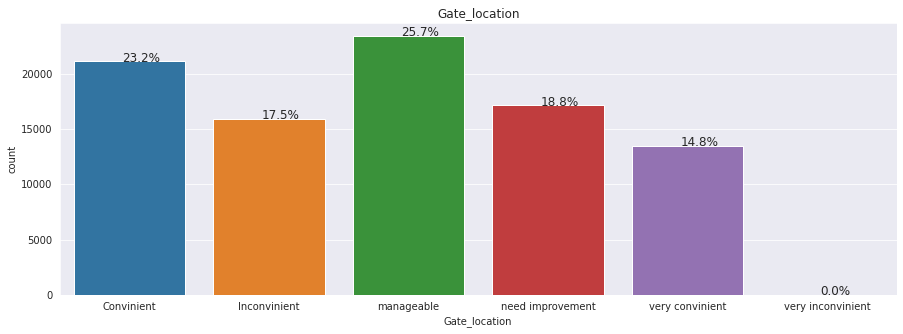

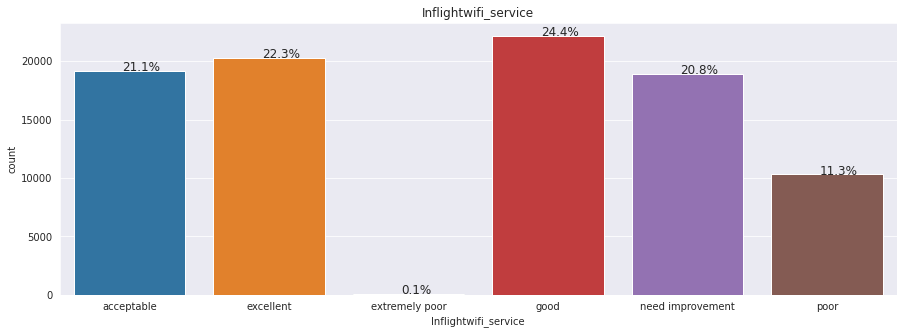

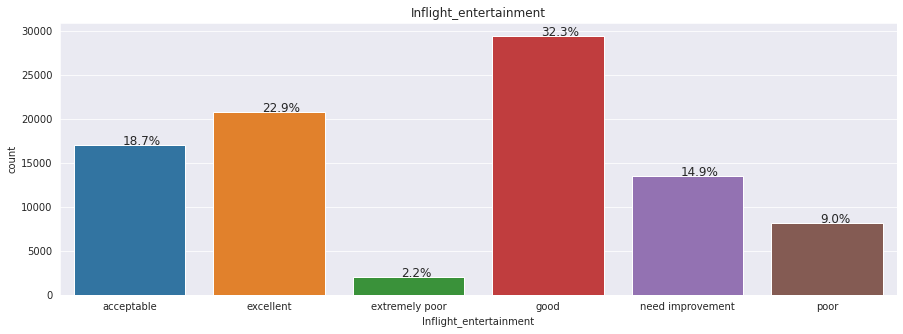

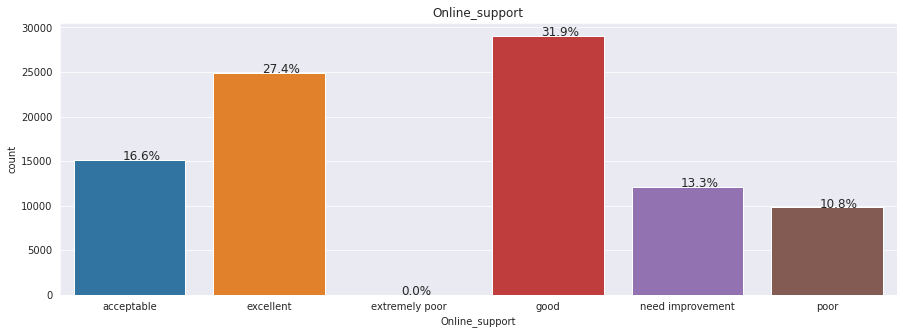

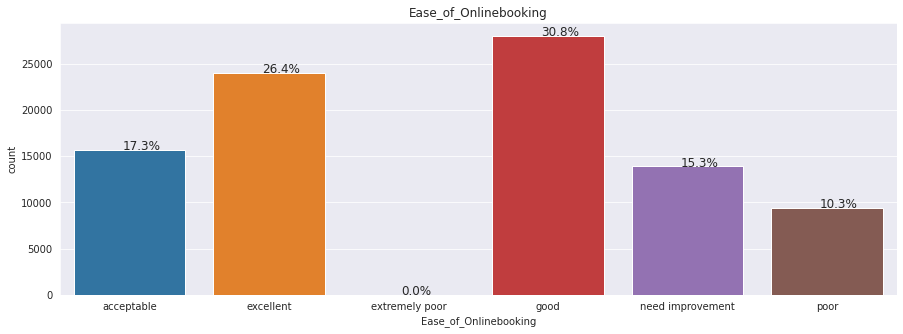

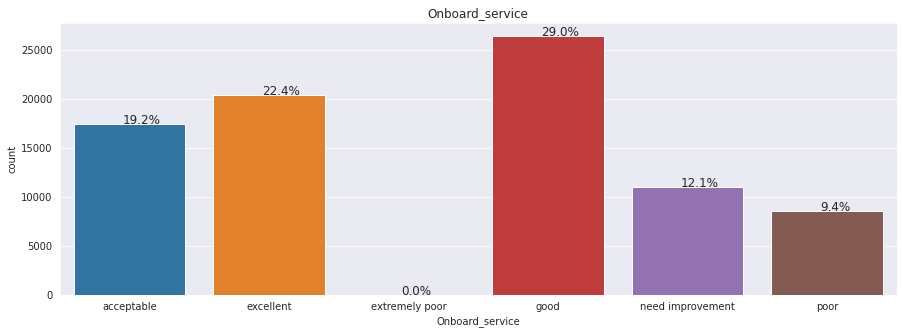

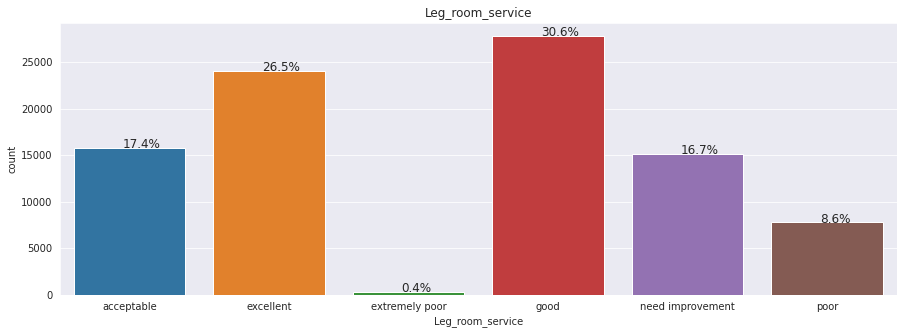

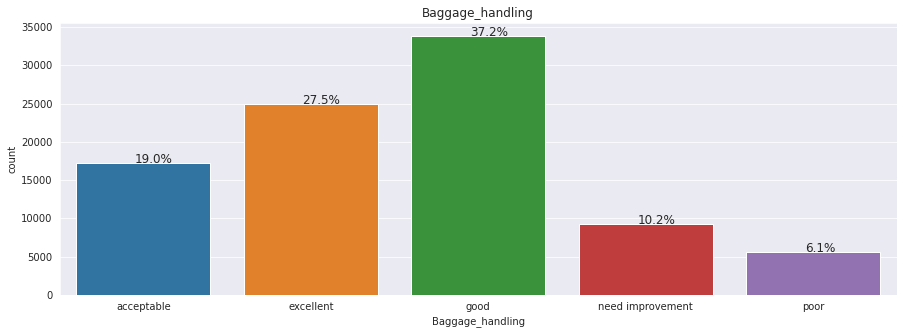

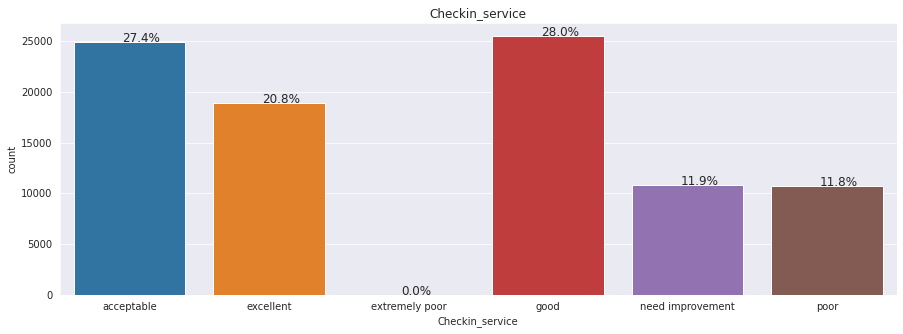

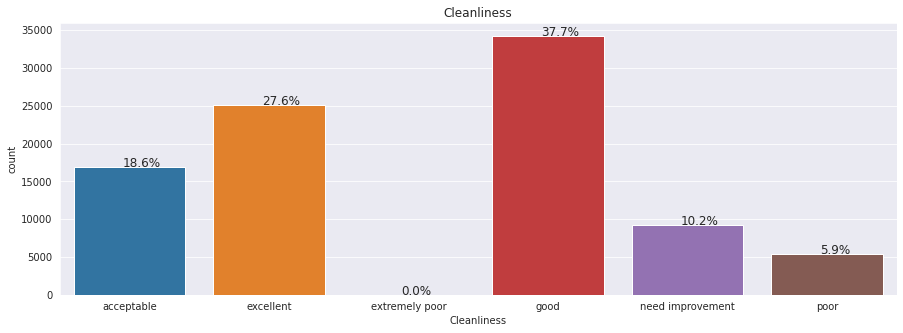

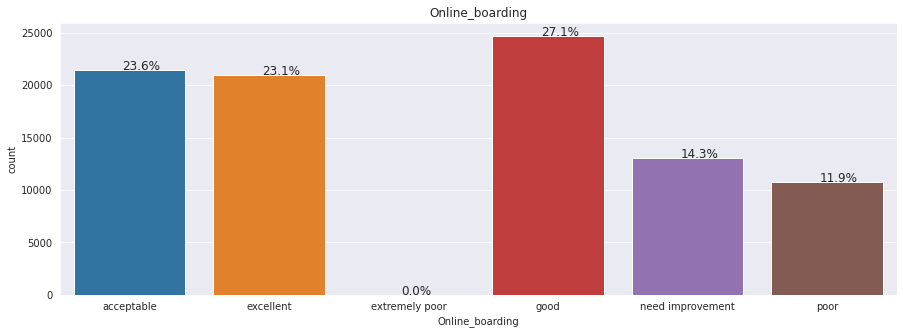

In [36]:
for column in df[[ 'Gender', 'CustomerType', 'TypeTravel', 'Class',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']] :
    plt.figure(figsize=(15,5))
    ax=sns.countplot(df[column])
    plt.title(column)
    perc_on_bar(ax,df[column])

Primary observations are that in most categories, the majority of respondents tend to be in a "positive" category. There aren't many more insights to be taken from the categorical data at this point. 

## Numerical Data

In [37]:
df.dtypes

CustomerId                           category
Gender                               category
CustomerType                         category
Age                                     int64
TypeTravel                           category
Class                                category
Flight_Distance                         int64
DepartureDelayin_Mins                   int64
ArrivalDelayin_Mins                   float64
Satisfaction                         category
Seat_comfort                         category
Departure.Arrival.time_convenient    category
Food_drink                           category
Gate_location                        category
Inflightwifi_service                 category
Inflight_entertainment               category
Online_support                       category
Ease_of_Onlinebooking                category
Onboard_service                      category
Leg_room_service                     category
Baggage_handling                     category
Checkin_service                   

In [38]:
numbers=df.select_dtypes(include=['int64','float64'])

In [39]:
numbers.columns

Index(['Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins'],
      dtype='object')

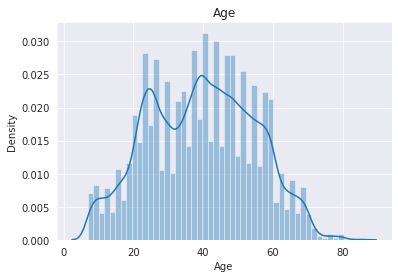

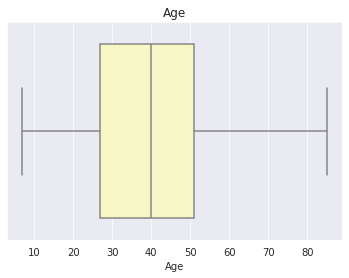

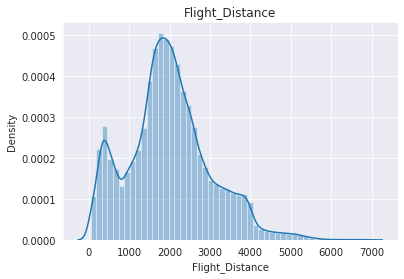

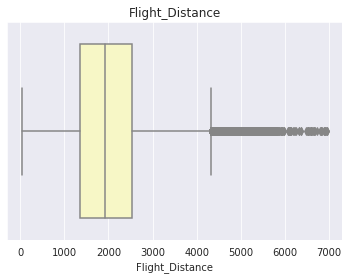

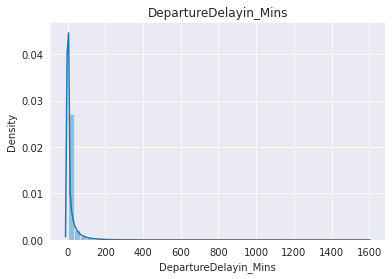

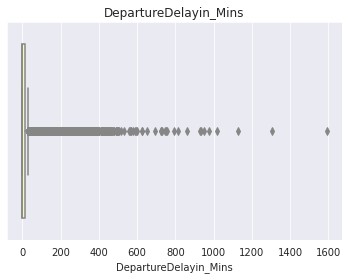

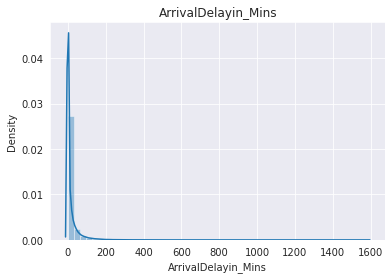

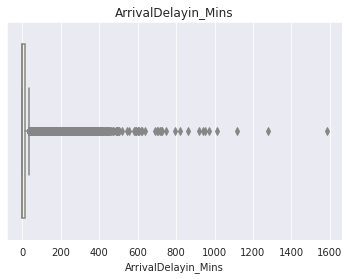

In [40]:
for column in df[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins']] :
    
    sns.distplot(df[column])
    plt.title(column)
    plt.show()
    
    sns.boxplot(df[column],palette='Spectral')
    plt.title(column)
    plt.show()

There are many outliers in most of the numerical variables. The treatment of these outliers will be crucial to future model building. 

## Multivariate Analysis

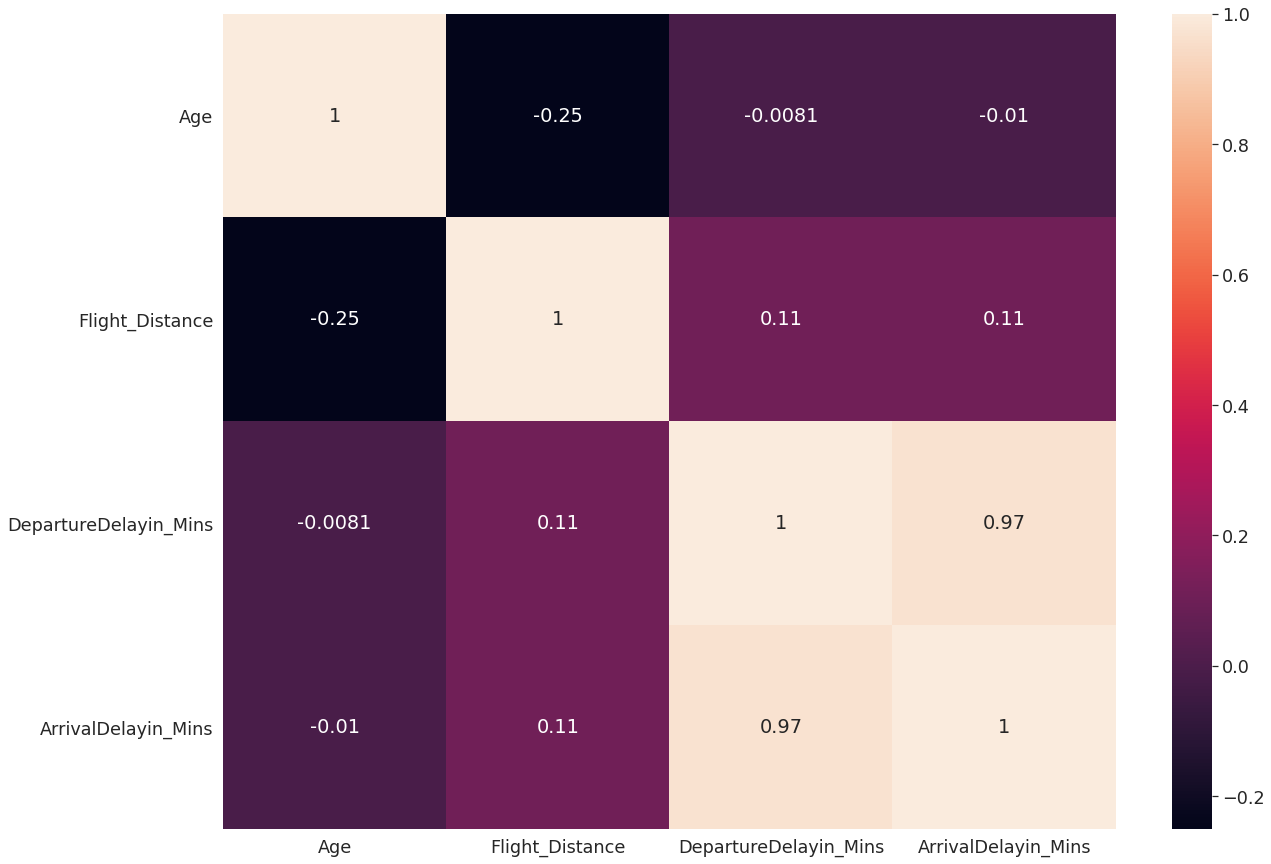

In [41]:
sns.set(font_scale=1.6)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

plt.show()

Only strong correlation from the limited numerical variables is between arrival delay and departure delay. These aren't independent of each other as it is unlikely that the flight wouldn't be able to "catch up" time on a set route. 

In [42]:
numbers.columns

Index(['Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins'],
      dtype='object')

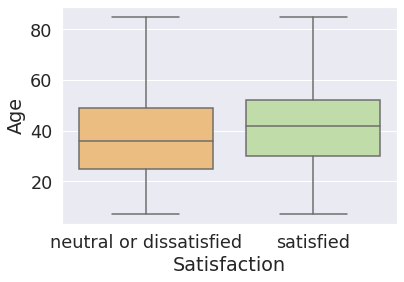

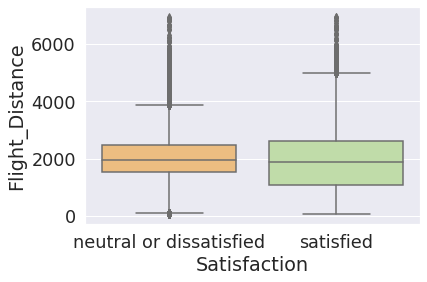

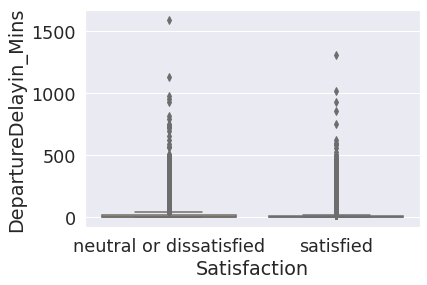

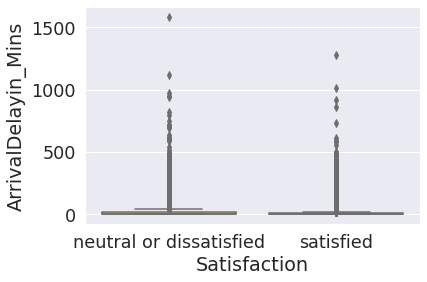

In [43]:
for column in df[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       'ArrivalDelayin_Mins']] :
    sns.boxplot(data=df, x='Satisfaction',y=column,palette='Spectral')
    plt.show()

There is no obvious correlation between satisfaction and our numerical variables at this point. Obviously, the outliers need to be dealt with in our time datasets. 

# Capstone Notes #2 Objectives
The second set of project notes must include findings from the exploratory data analysis post data pre-processing, and should layout the plan of action, with approach, for the model building phase of the project. The notes must include the design of the project and the analytical methodology you think will be appropriate for the project. The report should be simple and straightforward depicting the results/outcomes of the entire exercise. The python notebook has to be submitted along with the report in HTML format.

Below are the guidelines for the Project Notes-II:

Data pre-processing
Removal of unwanted variables
Missing Value Treatment
Outlier treatment
Variable Transformation
Addition of New variables

Exploratory Data Analysis
Relationship among variables, important variables (after data pre-processing)
Insightful visualizations

Analytical Approach (mention the alternative analytical approaches that you may see fit to be applied to the problem)

# New Section

# Missing Data


## There is a lot of missing data in this dataset but I don't want to impute and populate missing variables with a calculated value(median). I think this has the possibility to invalidate my models. I would rather sacrifice the variables with missing data and remove them to preserve the validity of the models.

## I have been instructed only to remove variables that have over 25% missing data. Therefore I will impute with the median. 

In [44]:
df.shape

(90917, 24)

In [45]:
df.isnull().sum()

CustomerId                              0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                   

## For the following variables I will choose to drop due to the amount of missing data: CustomerType, TypeTravel, Departure.Arrival.time_convenient, Food_drink, Onboard_service. I will also drop ArrivalDelayin_Mins as the correlation was revealed to be very high with DepartureDelayin_Mins

In [46]:
df.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [47]:
#df.drop(['CustomerType','TypeTravel','ArrivalDelayin_Mins','Departure.Arrival.time_convenient','Food_drink','Onboard_service'],axis=1,inplace=True)

In [48]:
df.isnull().sum()

CustomerId                              0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                   

# Outlier Removal

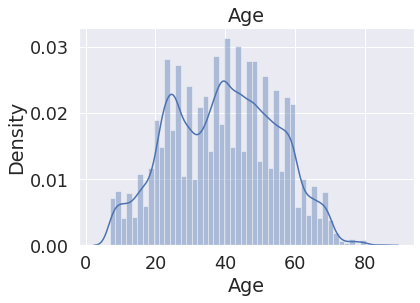

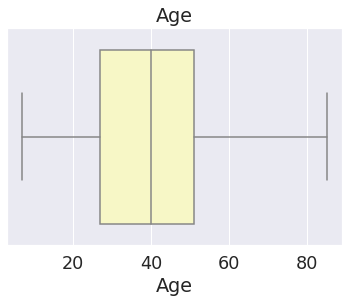

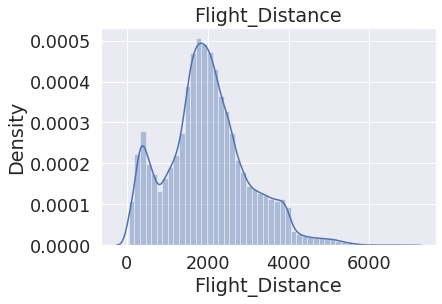

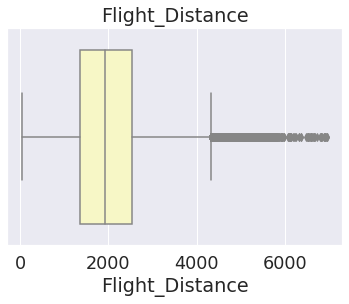

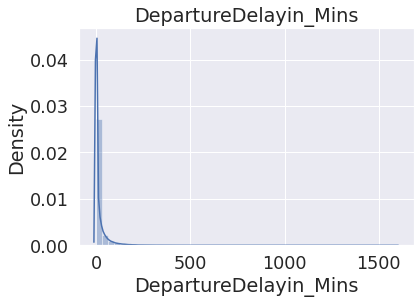

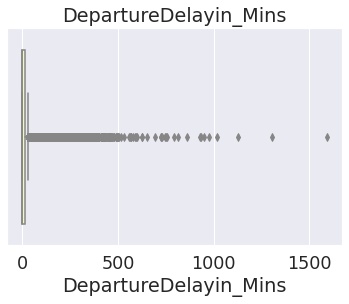

In [49]:
for column in df[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       ]] :
    
    sns.distplot(df[column])
    plt.title(column)
    plt.show()
    
    sns.boxplot(df[column],palette='Spectral')
    plt.title(column)
    plt.show()

In [50]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df


In [51]:
for column in df[[ 'Flight_Distance', 'DepartureDelayin_Mins']] :
    
    treat_outliers(df,column)

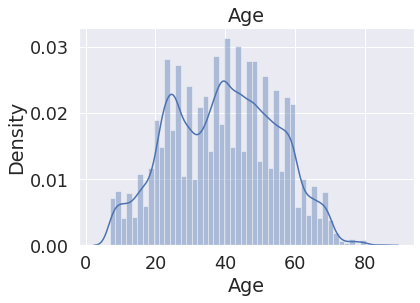

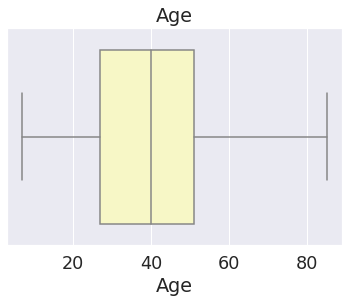

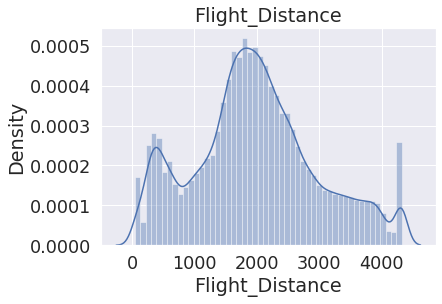

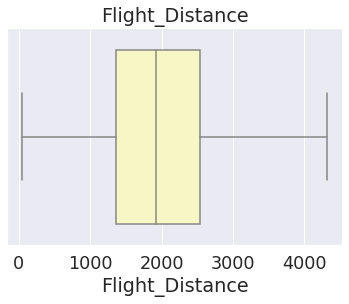

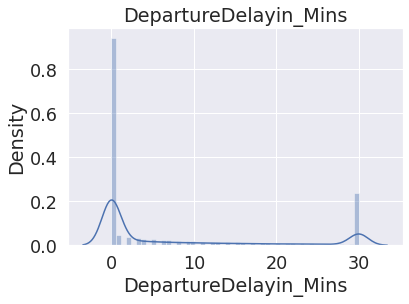

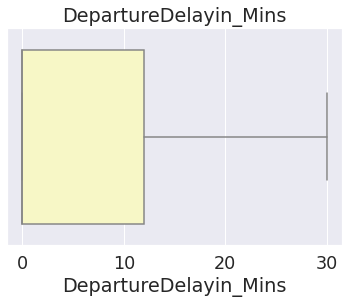

In [52]:
for column in df[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins',
       ]] :
    
    sns.distplot(df[column])
    plt.title(column)
    plt.show()
    
    sns.boxplot(df[column],palette='Spectral')
    plt.title(column)
    plt.show()

## Outliers have been clipped. This is clearly illustrated by the distributions that have spikes at the high ends.

# Categorical variable encoding. 

## I want to assign a value 0-5 to the responses to the survey. This will be needed in the modelling phase anyway. I prefer to see these responses as numerical values, anyway. 

In [53]:
categories=df.select_dtypes(include=['category'])

In [54]:
categories.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'TypeTravel', 'Class',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

In [55]:
df.Satisfaction.value_counts()

satisfied                  49761
neutral or dissatisfied    41156
Name: Satisfaction, dtype: int64

In [56]:
df.Seat_comfort.value_counts()

acceptable          20552
need improvement    20002
good                19789
poor                14687
excellent           12519
extremely poor       3368
Name: Seat_comfort, dtype: int64

In [57]:
df.Gate_location.value_counts()

manageable           23385
Convinient           21088
need improvement     17113
Inconvinient         15876
very convinient      13454
very inconvinient        1
Name: Gate_location, dtype: int64

In [58]:
df.isnull().sum()

CustomerId                              0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                   

In [59]:
gate_responses = {"Gate_location":     {"very inconvinient":0,"Inconvinient":1,'need improvement':2,'manageable':3,'Convinient':4,'very convinient':5}}

In [60]:
df2 = df.replace(gate_responses)
df2.head()

,CustomerId,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,2,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,3,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,extremely poor,NaN,extremely poor,3,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,3,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,3,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [61]:
responses=("extremely poor","poor",'need improvement','acceptable','good','excellent')
response_nums=(0,1,2,3,4,5)

In [62]:
response2number= dict(zip(responses,response_nums))
response2number

{'acceptable': 3,
 'excellent': 5,
 'extremely poor': 0,
 'good': 4,
 'need improvement': 2,
 'poor': 1}

In [63]:
df2 = df2.replace(response2number)
df2.head()

,CustomerId,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,0,0.0,0.0,3,2,0,2,2,NaN,3,4,4,4,2
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,0,NaN,0.0,3,3,4,3,1,1.0,0,1,4,1,3
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2


## Now all of my survey data has been given a 0-5 rating instead of a categorical rating. 0 being the worst, 5 being the best.

# EDA Post Processing

## Numerical Data

In [64]:
df2.dtypes

CustomerId                           category
Gender                               category
CustomerType                         category
Age                                     int64
TypeTravel                           category
Class                                category
Flight_Distance                         int64
DepartureDelayin_Mins                   int64
ArrivalDelayin_Mins                   float64
Satisfaction                         category
Seat_comfort                            int64
Departure.Arrival.time_convenient     float64
Food_drink                            float64
Gate_location                           int64
Inflightwifi_service                    int64
Inflight_entertainment                  int64
Online_support                          int64
Ease_of_Onlinebooking                   int64
Onboard_service                       float64
Leg_room_service                        int64
Baggage_handling                        int64
Checkin_service                   

In [65]:
numbers=df2.select_dtypes(include=['int64'])

In [66]:
numbers.columns

Index(['Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'Seat_comfort',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding'],
      dtype='object')

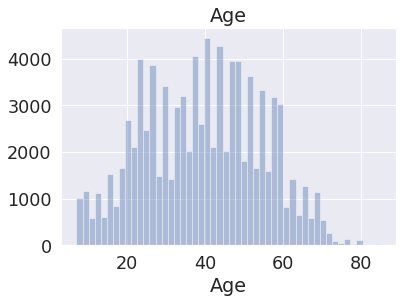

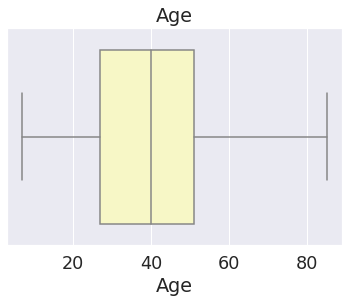

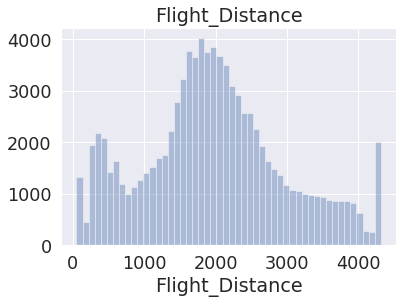

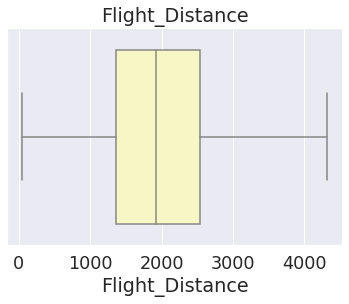

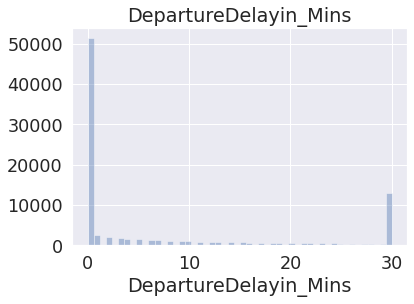

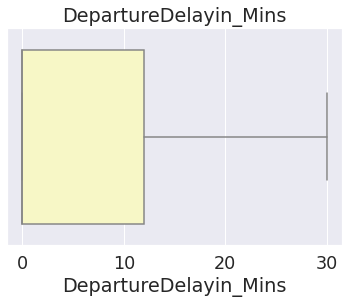

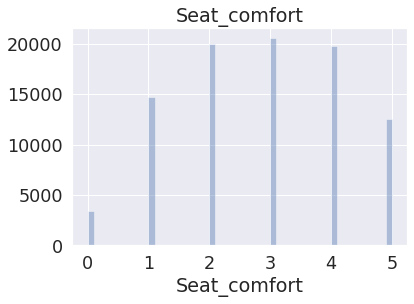

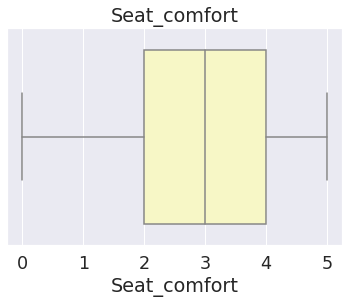

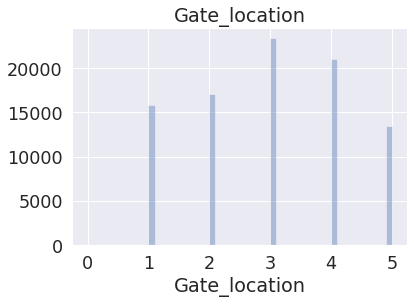

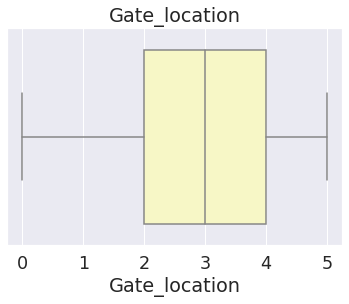

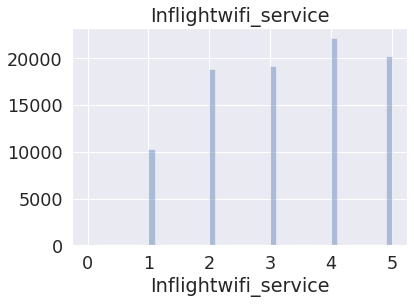

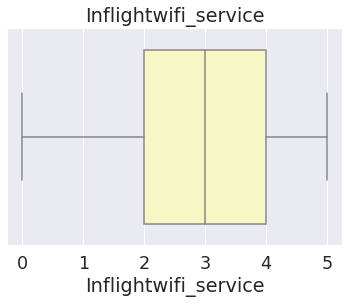

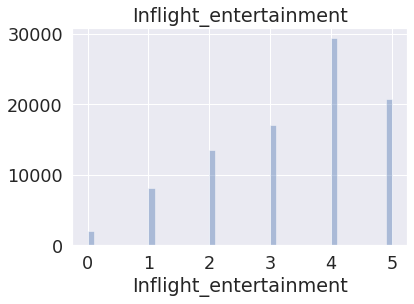

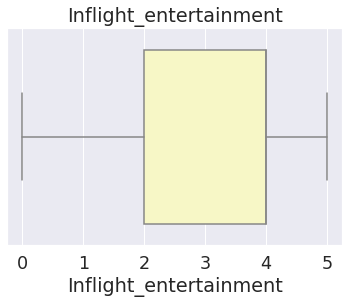

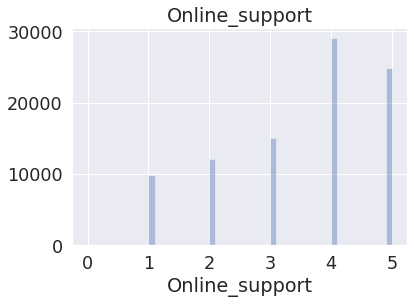

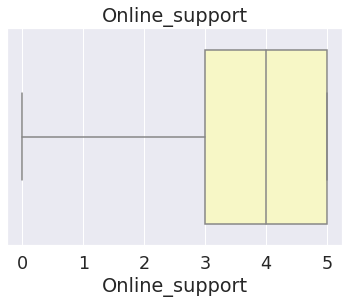

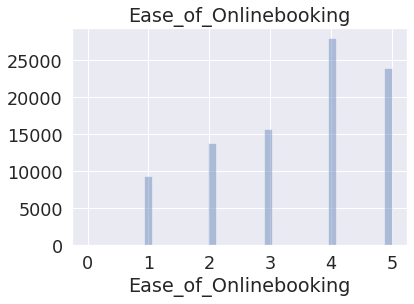

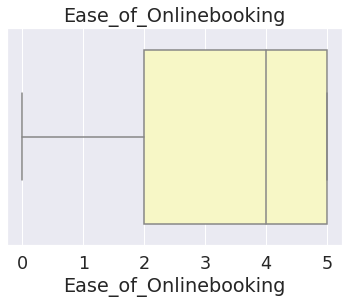

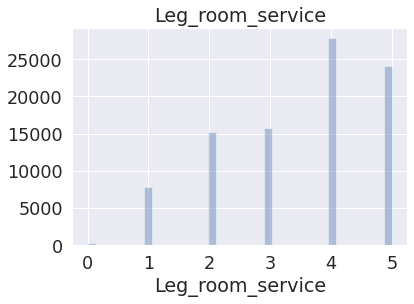

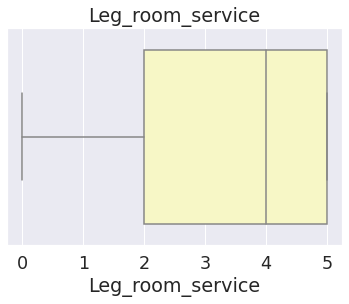

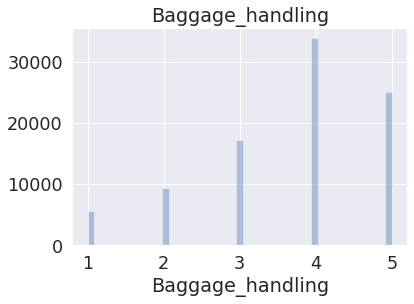

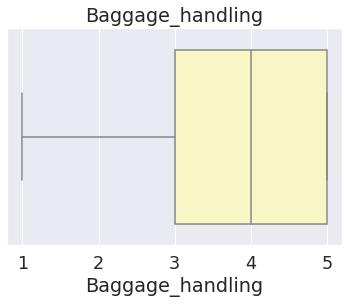

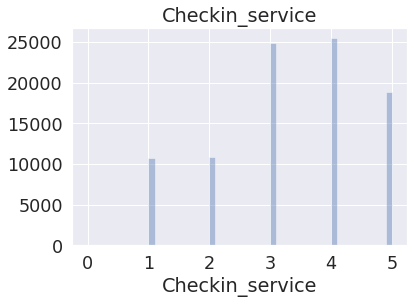

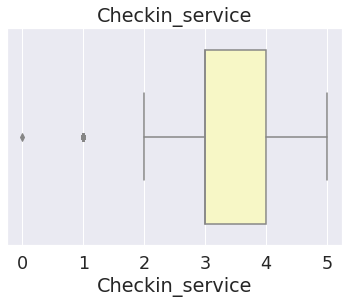

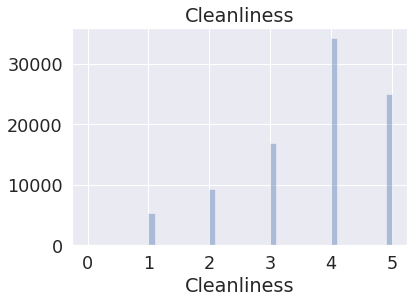

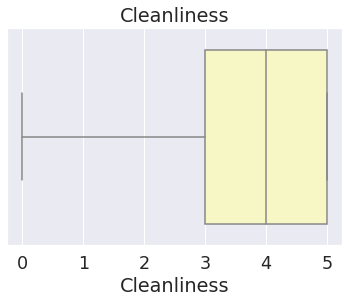

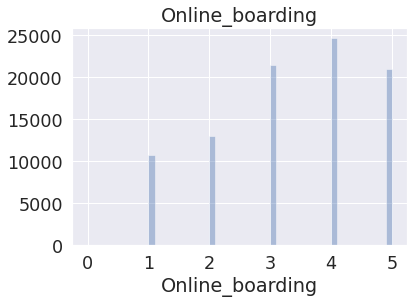

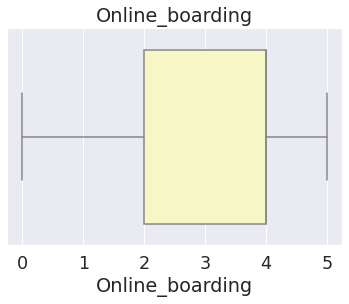

In [67]:
for column in df2[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'Seat_comfort',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding']] :
    
    sns.distplot(df2[column],kde=False)
    plt.title(column)
    plt.show()
    
    sns.boxplot(df2[column],palette='Spectral')
    plt.title(column)
    plt.show()

## Multivariate Analysis

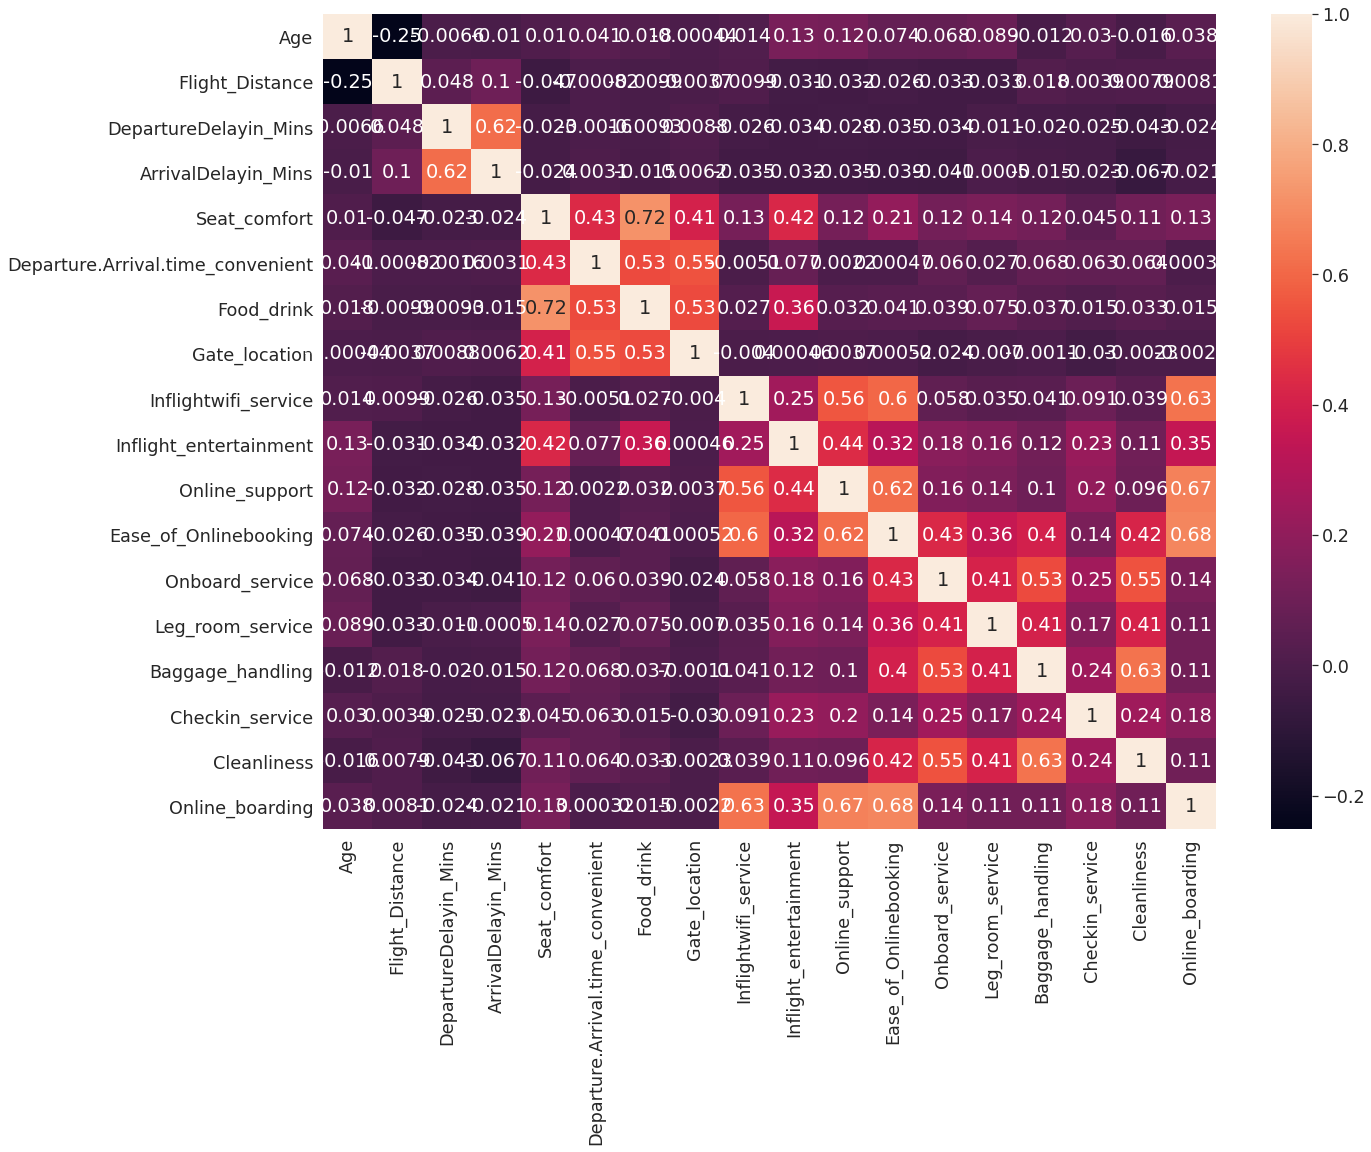

In [68]:
sns.set(font_scale=1.6)
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),annot=True)

plt.show()

Key correlation observations:
- The highest correlations tend to be among the online services variables, for example correlations between online boarding and online support. 
- There doesn't appear to be any strong negative correlations from these data


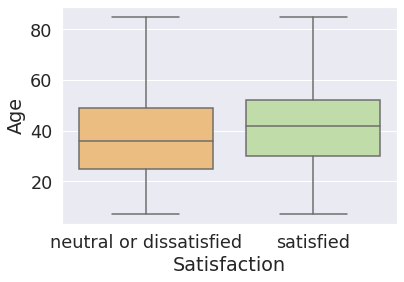

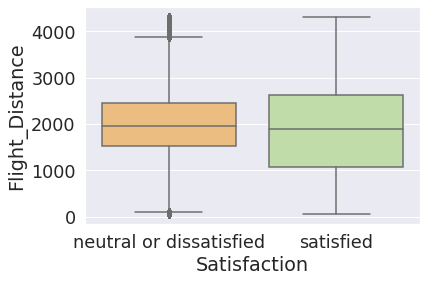

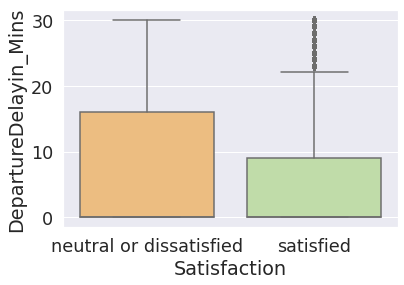

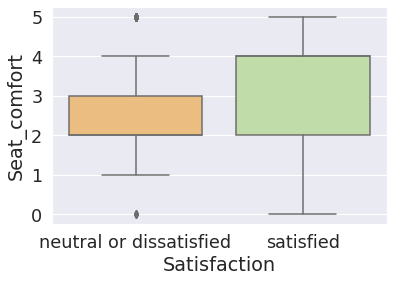

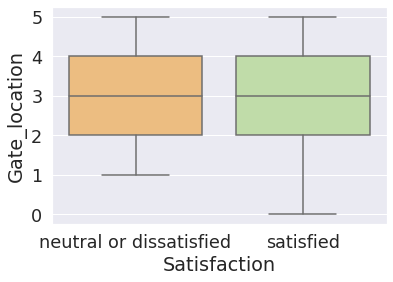

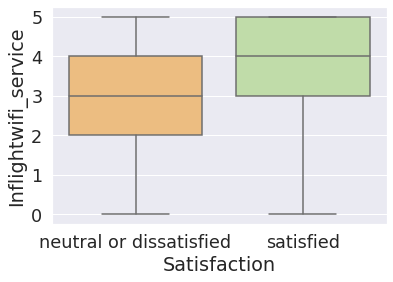

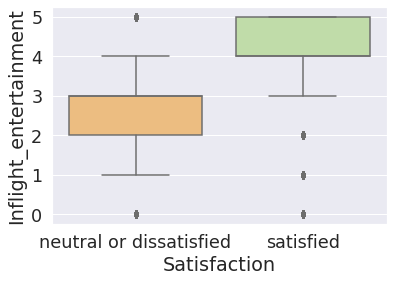

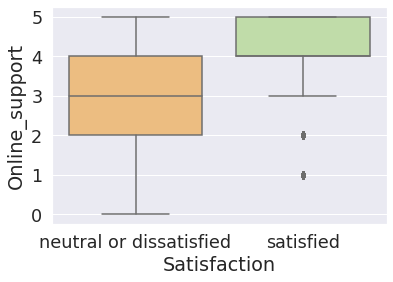

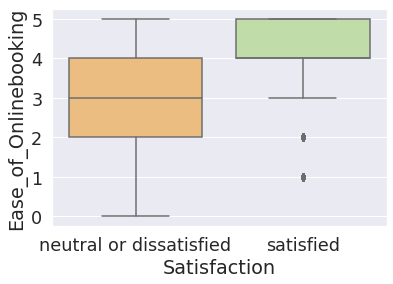

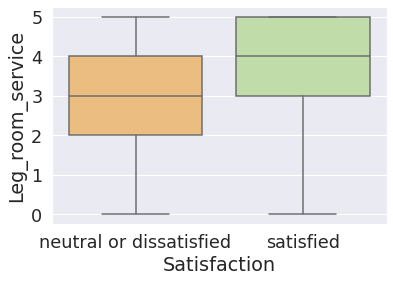

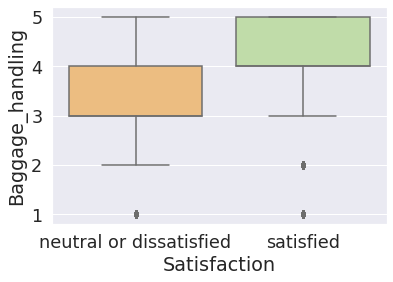

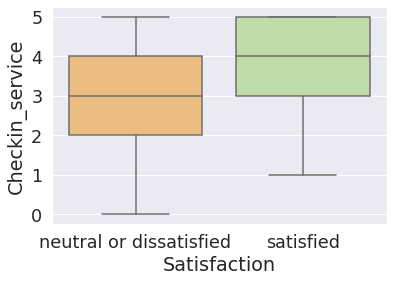

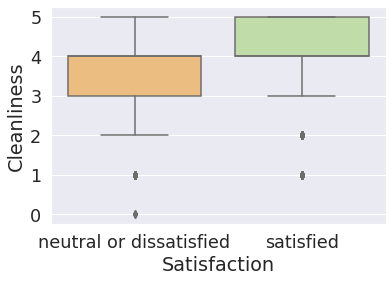

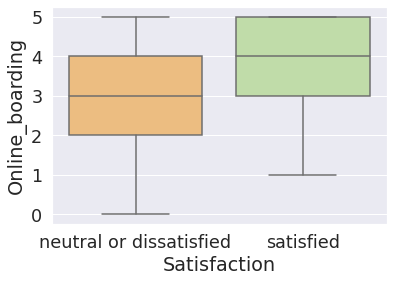

In [69]:
for column in df2[[ 'Age', 'Flight_Distance', 'DepartureDelayin_Mins', 'Seat_comfort',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding']] :
    sns.boxplot(data=df2, x='Satisfaction',y=column,palette='Spectral')
    plt.show()

Key observations when plotting satisfaction against our numerical variables reveals some interesting things:
- When looking at our survey results you can begin to see clear separation between the satisfied and dissatisfied customers
- The largest separations are seen in the following:
  - Inflight entertainment
  - Ease of online booking
  - Online support
  - Online boarding
  - Checkin Service

In [70]:
df2.dtypes

CustomerId                           category
Gender                               category
CustomerType                         category
Age                                     int64
TypeTravel                           category
Class                                category
Flight_Distance                         int64
DepartureDelayin_Mins                   int64
ArrivalDelayin_Mins                   float64
Satisfaction                         category
Seat_comfort                            int64
Departure.Arrival.time_convenient     float64
Food_drink                            float64
Gate_location                           int64
Inflightwifi_service                    int64
Inflight_entertainment                  int64
Online_support                          int64
Ease_of_Onlinebooking                   int64
Onboard_service                       float64
Leg_room_service                        int64
Baggage_handling                        int64
Checkin_service                   

In [71]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Satisfaction'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Satisfaction'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

In [72]:
df.columns

Index(['CustomerId', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins',
       'Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding'],
      dtype='object')

Satisfaction      neutral or dissatisfied  satisfied    All
Seat_comfort                                               
acceptable                          13274       7278  20552
excellent                              97      12422  12519
extremely poor                          6       3362   3368
good                                 6878      12911  19789
need improvement                    12904       7098  20002
poor                                 7997       6690  14687
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


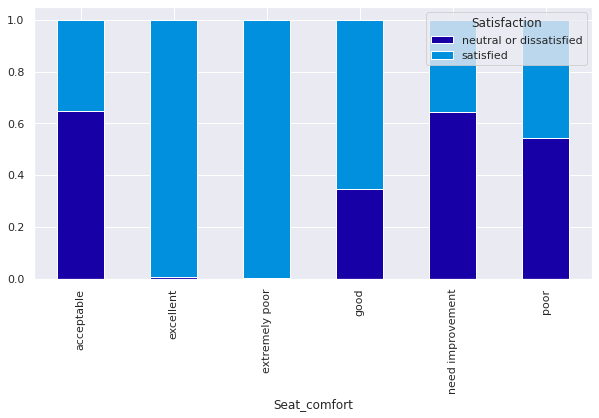

Satisfaction       neutral or dissatisfied  satisfied    All
Gate_location                                               
Convinient                           10621      10467  21088
Inconvinient                          6133       9743  15876
manageable                           12585      10800  23385
need improvement                      7222       9891  17113
very convinient                       4595       8859  13454
very inconvinient                        0          1      1
All                                  41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


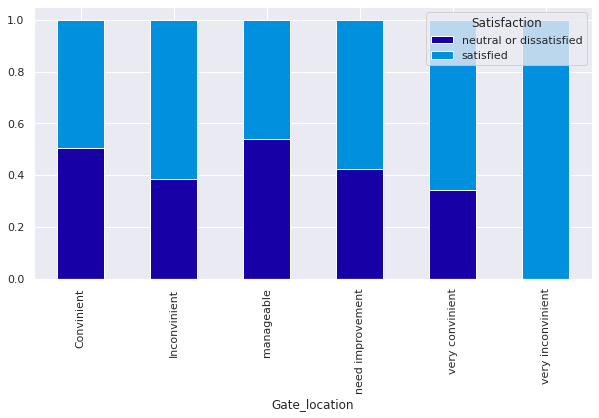

Satisfaction          neutral or dissatisfied  satisfied    All
Inflightwifi_service                                           
acceptable                               9382       9817  19199
excellent                                6753      13505  20258
extremely poor                             53         43     96
good                                     7994      14165  22159
need improvement                         9447       9447  18894
poor                                     7527       2784  10311
All                                     41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


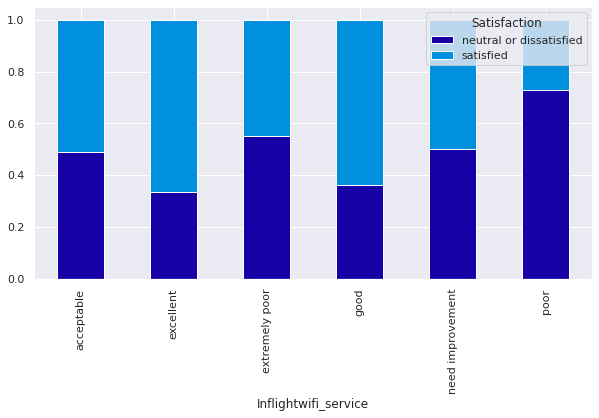

Satisfaction            neutral or dissatisfied  satisfied    All
Inflight_entertainment                                           
acceptable                                13641       3354  16995
excellent                                  1011      19775  20786
extremely poor                              678       1360   2038
good                                       8186      21187  29373
need improvement                          11181       2346  13527
poor                                       6459       1739   8198
All                                       41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


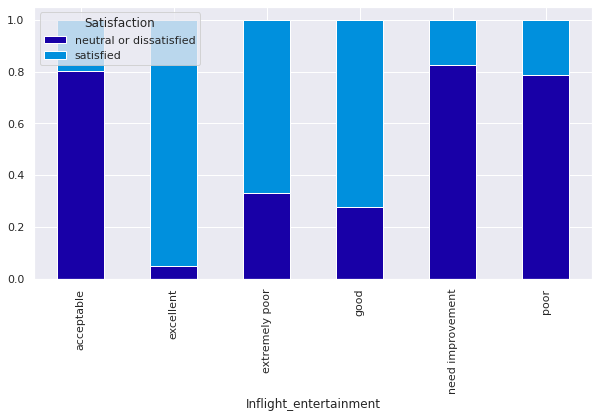

Satisfaction      neutral or dissatisfied  satisfied    All
Online_support                                             
acceptable                          10834       4256  15090
excellent                            5724      19192  24916
extremely poor                          1          0      1
good                                 9229      19813  29042
need improvement                     8501       3562  12063
poor                                 6867       2938   9805
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


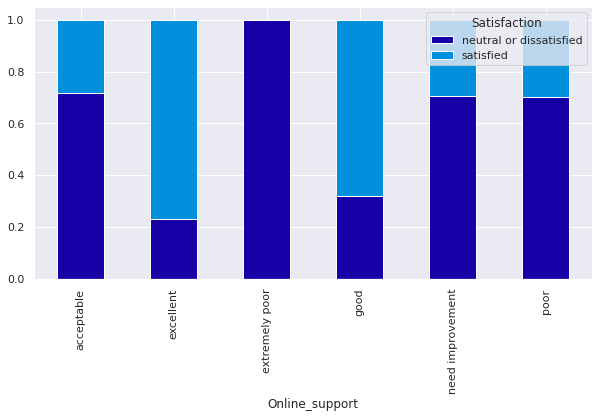

Satisfaction           neutral or dissatisfied  satisfied    All
Ease_of_Onlinebooking                                           
acceptable                               10067       5619  15686
excellent                                 5706      18254  23960
extremely poor                              12          0     12
good                                      7867      20126  27993
need improvement                          9944       3952  13896
poor                                      7560       1810   9370
All                                      41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


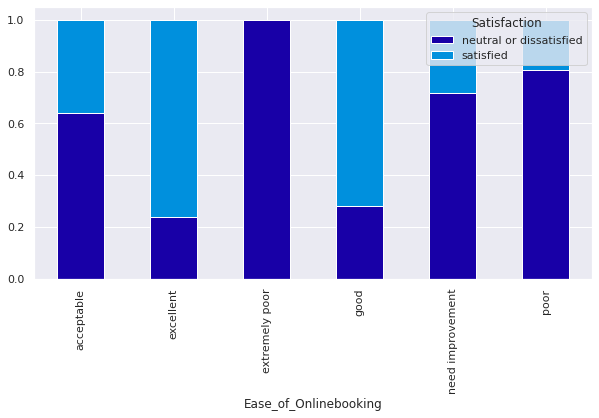

Satisfaction      neutral or dissatisfied  satisfied    All
Leg_room_service                                           
acceptable                           9952       5823  15775
excellent                            7018      17053  24071
extremely poor                        104        218    322
good                                 9051      18763  27814
need improvement                     9475       5681  15156
poor                                 5556       2223   7779
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


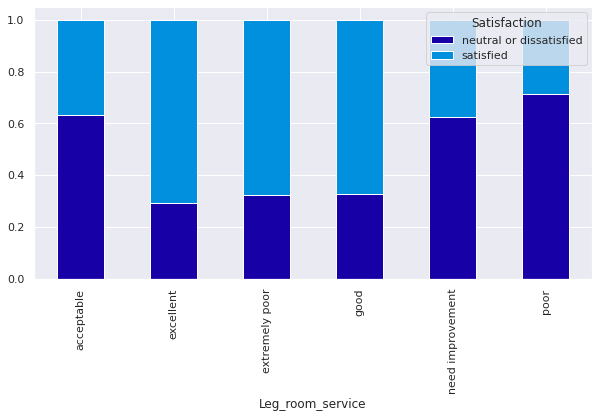

Satisfaction      neutral or dissatisfied  satisfied    All
Baggage_handling                                           
acceptable                          11771       5462  17233
excellent                            6629      18373  25002
good                                13927      19895  33822
need improvement                     5627       3674   9301
poor                                 3202       2357   5559
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


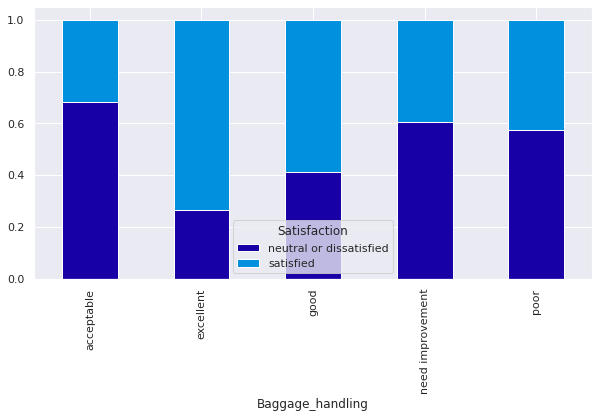

Satisfaction      neutral or dissatisfied  satisfied    All
Checkin_service                                            
acceptable                          10832      14109  24941
excellent                            5005      13913  18918
extremely poor                          1          0      1
good                                10728      14755  25483
need improvement                     7238       3575  10813
poor                                 7352       3409  10761
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


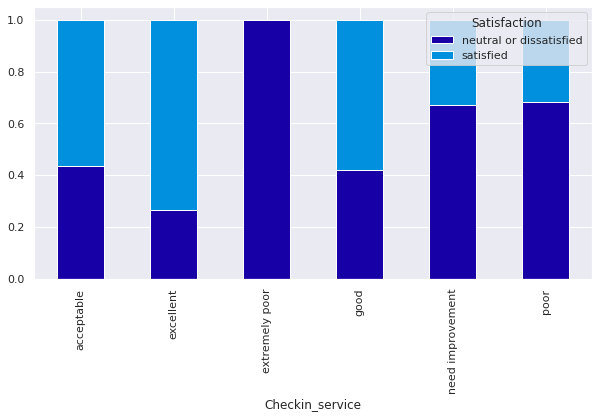

Satisfaction      neutral or dissatisfied  satisfied    All
Cleanliness                                                
acceptable                          11543       5387  16930
excellent                            6730      18349  25079
extremely poor                          4          0      4
good                                14151      20095  34246
need improvement                     5544       3739   9283
poor                                 3184       2191   5375
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


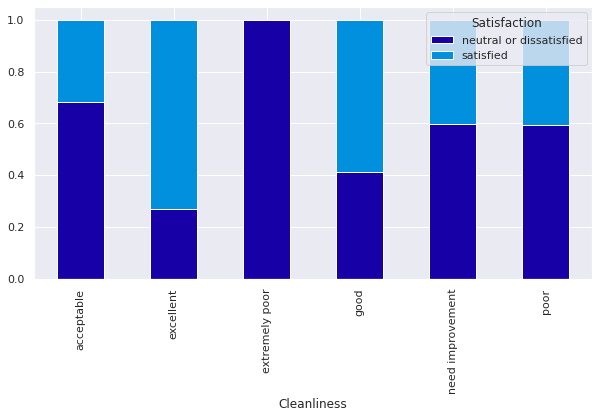

Satisfaction      neutral or dissatisfied  satisfied    All
Online_boarding                                            
acceptable                           9636      11791  21427
excellent                            5735      15258  20993
extremely poor                          9          0      9
good                                 8516      16160  24676
need improvement                     9356       3679  13035
poor                                 7904       2873  10777
All                                 41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


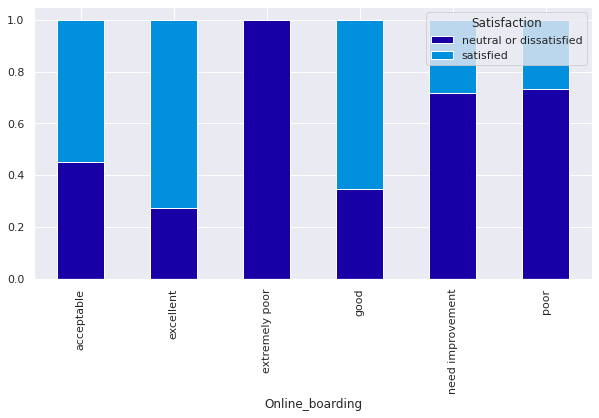

In [73]:
for column in df[['Seat_comfort',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding']]:
    stacked_plot(df[column])

# Data Encoding 

## Before modeling, I need to encode the remaining categorical data

## For the categorical data I will impute with the most common class for those values that are missing. For the missing numerical data I will use the median to impute.

## But before I do the imputation I want to split the data so that I dont have data bleeding between my train and test data

In [74]:
df2 = df2.rename(columns = {'Departure.Arrival.time_convenient': 'Departure_Arrival_time_convenient'}, inplace = False)

In [75]:
#I will drop customer ID for the modelling phase
df2.drop(['CustomerId'], axis=1, inplace=True)
df2.head()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure_Arrival_time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2
1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,0,0.0,0.0,3,2,0,2,2,NaN,3,4,4,4,2
2,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,0,NaN,0.0,3,3,4,3,1,1.0,0,1,4,1,3
3,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5
4,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2


In [76]:
df2.Satisfaction.value_counts()

satisfied                  49761
neutral or dissatisfied    41156
Name: Satisfaction, dtype: int64

In [77]:
#I need to encode the satisfaction flag for modelling, this is my dependant variable
Satisfaction_value={'Satisfaction':{'neutral or dissatisfied': 0, 'satisfied':1}}

In [78]:
df3 = df2.replace(Satisfaction_value)
df3.head()

,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure_Arrival_time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,1,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2
1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,1,0,0.0,0.0,3,2,0,2,2,NaN,3,4,4,4,2
2,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,1,0,NaN,0.0,3,3,4,3,1,1.0,0,1,4,1,3
3,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,1,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5
4,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,1,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2


In [79]:
#dependant value is now encoded, 1 is positive, 0 is neutral or negative
df3.Satisfaction.value_counts()

1    49761
0    41156
Name: Satisfaction, dtype: int64

In [80]:
categories=df3.select_dtypes(include=['category'])
categories.columns

Index(['Gender', 'CustomerType', 'TypeTravel', 'Class'], dtype='object')

In [81]:
encodecolumns=['Gender', 'CustomerType', 'TypeTravel', 'Class']
df3=pd.get_dummies(df3, columns=encodecolumns, drop_first=True)
df3.head(10)

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure_Arrival_time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0.0,1,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2,0,0,1,1,0
1,15,2138,0,0.0,1,0,0.0,0.0,3,2,0,2,2,NaN,3,4,4,4,2,0,0,1,1,0
2,60,623,0,0.0,1,0,NaN,0.0,3,3,4,3,1,1.0,0,1,4,1,3,0,0,1,1,0
3,70,354,0,0.0,1,0,0.0,0.0,3,4,3,4,2,2.0,0,2,4,2,5,0,0,1,1,0
4,30,1894,0,0.0,1,0,0.0,0.0,3,2,0,2,2,5.0,4,5,5,4,2,1,0,0,1,0
5,66,227,17,15.0,1,0,0.0,NaN,3,2,5,5,5,5.0,0,5,5,5,3,0,0,1,1,0
6,10,1812,0,0.0,1,0,0.0,NaN,3,2,0,2,2,3.0,3,4,5,4,2,1,0,1,1,0
7,22,1556,30,26.0,1,0,NaN,0.0,3,2,0,2,2,2.0,4,5,3,4,2,1,0,1,1,0
8,58,104,30,48.0,1,0,0.0,0.0,3,3,3,3,3,3.0,0,1,2,3,5,0,0,1,1,0
9,34,3633,0,0.0,1,0,0.0,0.0,4,2,0,2,2,3.0,2,5,2,5,2,0,0,1,1,0


# Split Data

In [82]:
x = df3.drop(["Satisfaction"], axis=1)
y = df3["Satisfaction"]

In [83]:
x.head(1)

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Seat_comfort,Departure_Arrival_time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender_Male,CustomerType_disloyal Customer,TypeTravel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0.0,0,0.0,0.0,2,2,4,2,3,3.0,0,3,5,3,2,0,0,1,1,0


In [84]:
y.head(1)

0    1
Name: Satisfaction, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=7,stratify=y)

In [86]:
y_train.isnull().sum()

0

# Imputation

In [87]:
X_test.isnull().sum()

Age                                     0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                    80
Seat_comfort                            0
Departure_Arrival_time_convenient    2428
Food_drink                           2469
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      2154
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender_Male                             0
CustomerType_disloyal Customer          0
TypeTravel_Personal Travel              0
Class_Eco                               0
Class_Eco Plus                          0
dtype: int64

In [88]:
X_test['ArrivalDelayin_Mins'] = X_test['ArrivalDelayin_Mins'].fillna(X_test['ArrivalDelayin_Mins'].median())
X_test['Departure_Arrival_time_convenient'] = X_test['Departure_Arrival_time_convenient'].fillna(X_test['Departure_Arrival_time_convenient'].median())
X_test['Food_drink'] = X_test['Food_drink'].fillna(X_test['Food_drink'].median())
X_test['Onboard_service'] = X_test['Onboard_service'].fillna(X_test['Onboard_service'].median())

In [89]:
#Now we have no missing data, the Nans have been imputed with the median
X_test.isnull().sum()

Age                                  0
Flight_Distance                      0
DepartureDelayin_Mins                0
ArrivalDelayin_Mins                  0
Seat_comfort                         0
Departure_Arrival_time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Gender_Male                          0
CustomerType_disloyal Customer       0
TypeTravel_Personal Travel           0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [90]:
X_train.isnull().sum()

Age                                     0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   204
Seat_comfort                            0
Departure_Arrival_time_convenient    5816
Food_drink                           5712
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      5025
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender_Male                             0
CustomerType_disloyal Customer          0
TypeTravel_Personal Travel              0
Class_Eco                               0
Class_Eco Plus                          0
dtype: int64

In [91]:
X_train['ArrivalDelayin_Mins'] = X_train['ArrivalDelayin_Mins'].fillna(X_train['ArrivalDelayin_Mins'].median())
X_train['Departure_Arrival_time_convenient'] = X_train['Departure_Arrival_time_convenient'].fillna(X_train['Departure_Arrival_time_convenient'].median())
X_train['Food_drink'] = X_train['Food_drink'].fillna(X_train['Food_drink'].median())
X_train['Onboard_service'] = X_train['Onboard_service'].fillna(X_train['Onboard_service'].median())

In [92]:
#No missing data in the training dataset, Nans were filled in place of the missing data
X_train.isnull().sum()

Age                                  0
Flight_Distance                      0
DepartureDelayin_Mins                0
ArrivalDelayin_Mins                  0
Seat_comfort                         0
Departure_Arrival_time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Gender_Male                          0
CustomerType_disloyal Customer       0
TypeTravel_Personal Travel           0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

# Capstone Project: Project Notes III
The final set of project notes must be a thorough report on your modeling process and how you built on your initial analysis to increase the accuracy of your model. The notes must include the interpretations of the best model concluding with the usability in terms of business application i.e what difference this project will make in the end. The focus should be more on the insights, conclusion, and business interpretation. The python notebook has to be submitted in HTML format along with the report(ppt/pptx).

Below are the guidelines for the Project Notes-III:               

- Modelling Process (validation & interpretation)
- Model comparisons (confusion matrix, ROC, AUC whichever is applicable)
- Ensemble modeling, wherever applicable
- Interpretation from the best model
- Business insights

In [93]:
df3.Satisfaction.value_counts(1)

1    0.547323
0    0.452677
Name: Satisfaction, dtype: float64

In [94]:
y_test.value_counts(1)

1    0.547331
0    0.452669
Name: Satisfaction, dtype: float64

In [95]:
y_train.value_counts(1)

1    0.54732
0    0.45268
Name: Satisfaction, dtype: float64

### The test and train datasets are representative of the overall dataset for satisfaction

# Modeling

##  The two objective of this project are-

- To understand which parameters play an important role in swaying a passenger feedback towards ‘satisfied’.
- To predict whether a passenger will be satisfied or not given the rest of the details are provided


## Performance Measurements

- Since our classes for satisfaction are close to balanced (55/45) we might be able to reliably look at accuracy to measure model performance.

- The false positive scenario (predicting somebody as satisfied who is dissatisfied) is more costly because if we identifiy somebody as satisfied and they aren't then we could potentially lose them as a customer by not swaying them toward the satisfied customer category. Therefore, we want to minimize the false positives. Therefore, we should also focus on precision.

- The cost of false negative (identifying somebody as dissatisfied that is satisfied) is lower because we will try and sway that customer and the cost would be whatever costs were incurred to improve services for that particular customer but that customer and all repeat business will be retained.

## Functions

In [96]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [97]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
def get_metrics_score2(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Logistic Regression

In [98]:
logreg = LogisticRegression(random_state=40)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
scoring='precision' #metric to display and measure is precision

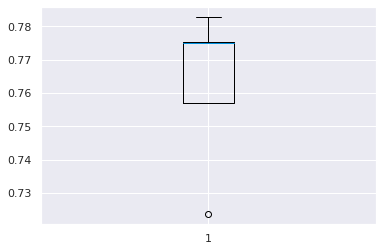

In [100]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)  #set up k fold, 5 splits
cv_result_bfr=cross_val_score(estimator=logreg, X=X_train, y=y_train, scoring=scoring, cv=kfold) #set up cross validation and assign cross val as kfold
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.7826244087930736
Accuracy on test set :  0.7795131250916557
Recall on training set :  0.8561380339917317
Recall on test set :  0.8508272489784983
Precision on training set :  0.7716851257633786
Precision on test set :  0.7703317363090545


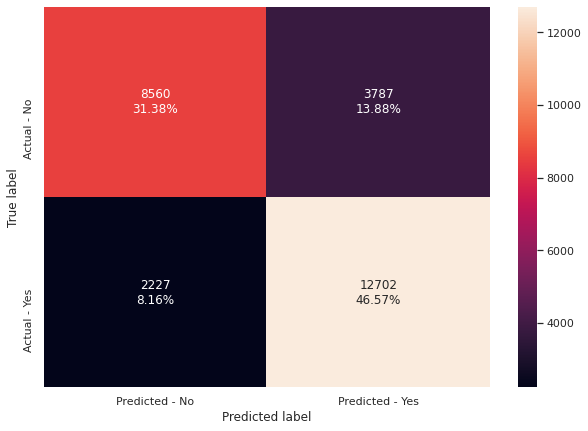

In [101]:
logreg_score = get_metrics_score(logreg,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(logreg,y_test)

The logistic regression did pretty well as the accuracy and precison metrics are in the high 70's. Also, there doesn't appear to me excessive overfitting. 

## Decision Tree

In [102]:
 dtree_estimator=DecisionTreeClassifier(random_state=1)
 dtree_estimator.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Accuracy on training set :  1.0
Accuracy on test set :  0.9259055579997068
Recall on training set :  1.0
Recall on test set :  0.9348918212874272
Precision on training set :  1.0
Precision on test set :  0.9300946288151406


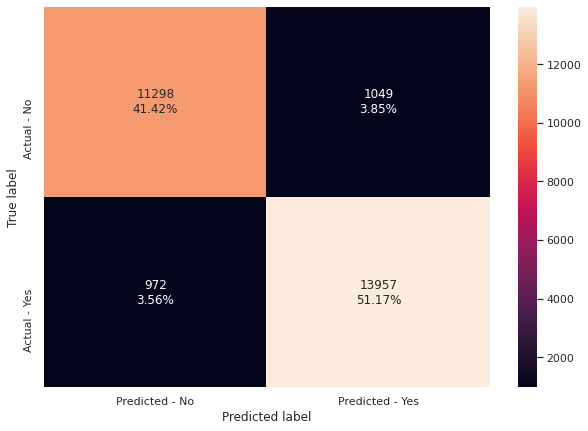

In [103]:
get_metrics_score(dtree_estimator,X_train,X_test,y_train,y_test)


make_confusion_matrix(dtree_estimator,y_test)

### GridSearchCV

In [104]:
# Determine best parameters via GridSearchCV
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2} 
Score: 0.9348875163546321


In [105]:
dtree_tuned1=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=None, min_samples_split=2))
dtree_tuned1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=False)

Accuracy on training set :  1.0
Accuracy on test set :  0.9285085789705235
Recall on training set :  1.0
Recall on test set :  0.9375711702056401
Precision on training set :  1.0
Precision on test set :  0.9322011322011322


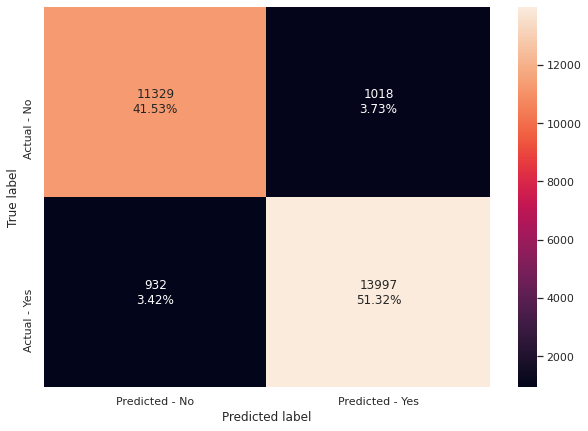

In [106]:
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

make_confusion_matrix(dtree_tuned1,y_test)

The tuned decision tree via GridSearchCV shows slight improvements over the untuned model. Overall it performs well for all metrics. 

### RandomSearchCV

In [107]:
# Determine best parameters via RandomSearchCV
# Creating pipeline
pipe6 = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomSearchCV

random_cv=RandomizedSearchCV(estimator=pipe6, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)
# Fitting parameters in RandomSearchCV
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__criterion': 'entropy'} 
Score: 0.9348875163546321


In [108]:
dtree_tuned2=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=None, min_samples_split=2))
dtree_tuned2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=False)

Accuracy on training set :  1.0
Accuracy on test set :  0.9285085789705235
Recall on training set :  1.0
Recall on test set :  0.9375711702056401
Precision on training set :  1.0
Precision on test set :  0.9322011322011322


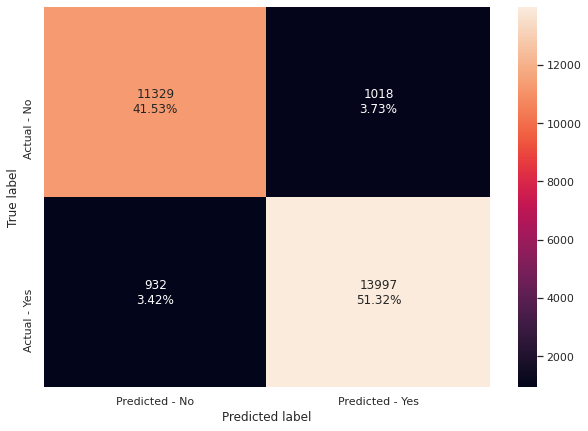

In [112]:
dtree_tuned2_score=get_metrics_score2(dtree_tuned2)


make_confusion_matrix(dtree_tuned2,y_test)

No noticeable improvements over GridSearchCV or untuned model. 

## Bagging

In [113]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

Accuracy on training set :  0.9964174038748606
Accuracy on test set :  0.9428801877108081
Recall on training set :  0.9944591180523656
Recall on test set :  0.934021032889008
Precision on training set :  0.9989905981427006
Precision on test set :  0.9605290349245712


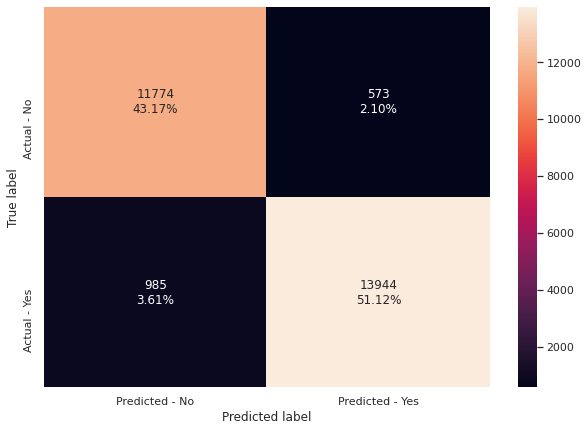

In [114]:
get_metrics_score(bagging_estimator,X_train,X_test,y_train,y_test)


make_confusion_matrix(bagging_estimator,y_test)

Slight improvements over Decision Tree methodology. 

### !GridSearchCV

In [115]:
pipe2=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1))
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'baggingclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'baggingclassifier__base_estimator', 'baggingclassifier__bootstrap', 'baggingclassifier__bootstrap_features', 'baggingclassifier__max_features', 'baggingclassifier__max_samples', 'baggingclassifier__n_estimators', 'baggingclassifier__n_jobs', 'baggingclassifier__oob_score', 'baggingclassifier__random_state', 'baggingclassifier__verbose', 'baggingclassifier__warm_start'])

In [116]:
pipe2=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1))

parameters=  {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

acc_scorer= metrics.make_scorer(metrics.recall_score)

grid_cv2=GridSearchCV(pipe2,parameters,scoring=acc_scorer, cv=5)
grid_cv2=grid_cv2.fit(X_train,y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv2.best_params_, grid_cv2.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.8, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.9476056744438249


In [117]:
bagging_tuned1=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1,max_features=0.8, max_samples=.9,n_estimators=50))
bagging_tuned1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=0.8,
                                   max_samples=0.9, n_estimators=50,
                                   n_jobs=None, oob_score=False, random_state=1,
                                   verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9998428685910027
Accuracy on test set :  0.9495527203402259
Recall on training set :  0.9997416169039963
Recall on test set :  0.9470158751423404
Precision on training set :  0.9999712841718356
Precision on test set :  0.9602662500849012


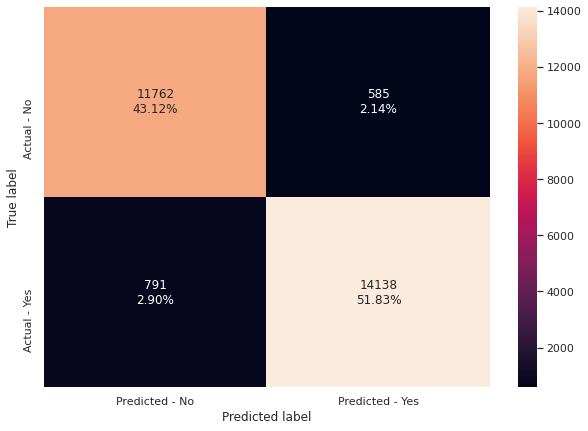

In [118]:
get_metrics_score(bagging_tuned1,X_train,X_test,y_train,y_test)

make_confusion_matrix(bagging_tuned1,y_test)

Slight improvement over untuned model.

### !RandomSearchCV

In [121]:
pipe5=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1))

parameters=  {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

acc_scorer= metrics.make_scorer(metrics.recall_score)

random_cv4=RandomizedSearchCV(estimator=pipe5, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1)
random_cv4=random_cv4.fit(X_train,y_train)


print(
    "Best Parameters:{} \nScore: {}".format(random_cv4.best_params_, random_cv4.best_score_)
)

Best Parameters:{'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.8} 
Score: 0.9476056744438249


In [107]:
bagging_tuned2=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1,max_features=.8, max_samples=.9,n_estimators=50))
bagging_tuned2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=0.8,
                                   max_samples=0.9, n_estimators=50,
                                   n_jobs=None, oob_score=False, random_state=1,
                                   verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9998428685910027
Accuracy on test set :  0.9495527203402259
Recall on training set :  0.9997416169039963
Recall on test set :  0.9470158751423404
Precision on training set :  0.9999712841718356
Precision on test set :  0.9602662500849012


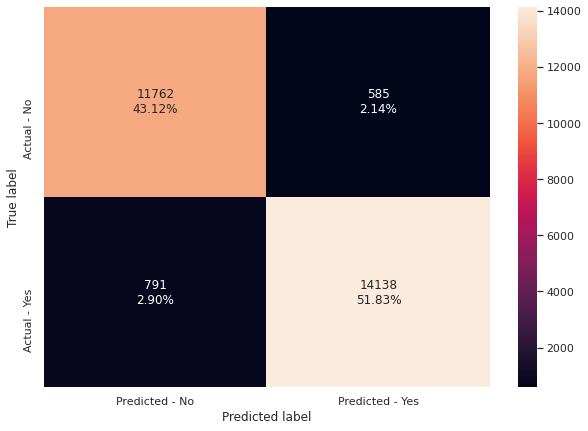

In [123]:
bagging_tuned2_score=get_metrics_score2(bagging_tuned2)


make_confusion_matrix(bagging_tuned2,y_test)

No upgrade from previous tuning. 

## Random Forest

In [119]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Accuracy on training set :  1.0
Accuracy on test set :  0.9491860976682798
Recall on training set :  1.0
Recall on test set :  0.9468819076964298
Precision on training set :  1.0
Precision on test set :  0.9597392898363772


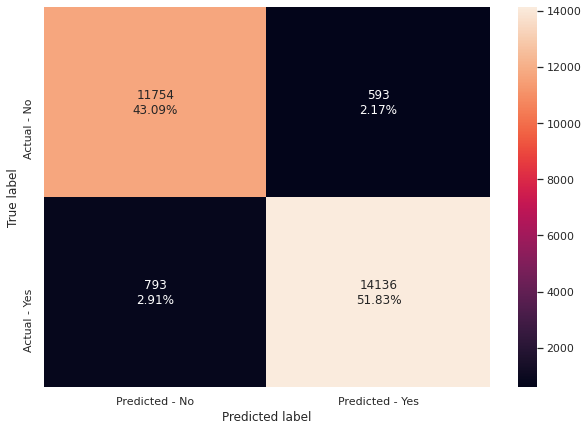

In [120]:
get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)


make_confusion_matrix(rf_estimator,y_test)

In general similar to the bagging algorithm.

### RandomSearchCV

In [124]:
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

In [125]:
%%time

pipe4=make_pipeline(StandardScaler(),RandomForestClassifier(random_state=1))

parameters = {"randomforestclassifier__n_estimators": [150,200,250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
    "randomforestclassifier__max_samples": np.arange(0.3, 0.7, 0.1),
             }

acc_scorer= metrics.make_scorer(metrics.recall_score)

random_cv3=RandomizedSearchCV(estimator=pipe4, param_distributions=parameters, n_iter=50, scoring=acc_scorer, cv=5, random_state=1)
random_cv3=random_cv3.fit(X_train,y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv3.best_params_, random_cv3.best_score_))

Best Parameters:{'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_samples': 0.6000000000000001, 'randomforestclassifier__max_features': 0.4000000000000001} 
Score: 0.944993116105659
CPU times: user 42min 47s, sys: 7.59 s, total: 42min 54s
Wall time: 42min 43s


In [109]:
rf_tuned2=make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,max_features=.4, max_samples=.6 ,n_estimators=250, min_samples_leaf=5))
rf_tuned2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=0.4,
                                        max_leaf_nodes=None, max_samples=0.6,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=250, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9706007133765968
Accuracy on test set :  0.9461064672239331
Recall on training set :  0.9667834175470832
Recall on test set :  0.9455422332373233
Precision on training set :  0.9792375468899939
Precision on test set :  0.9555269748866175


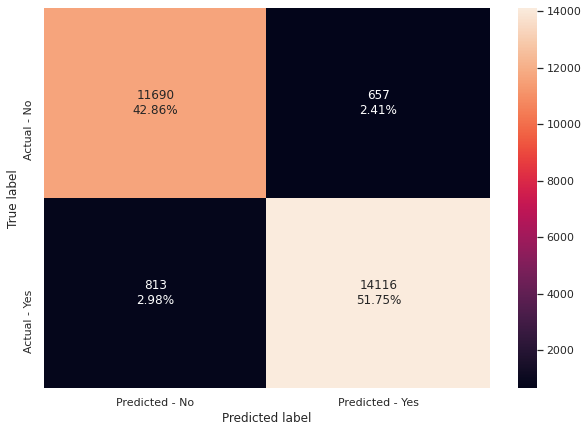

In [127]:
rf_tuned2_score=get_metrics_score2(rf_tuned2)


make_confusion_matrix(rf_tuned2,y_test)

No obvious upgrade from tuning. 

## XGBoost

In [128]:
xgboost=XGBClassifier(random_state=1)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy on training set :  0.9188416272528716
Accuracy on test set :  0.9154201495820502
Recall on training set :  0.9242937528709233
Recall on test set :  0.9200214347913457
Precision on training set :  0.9271952308268295
Precision on test set :  0.9250404094827587


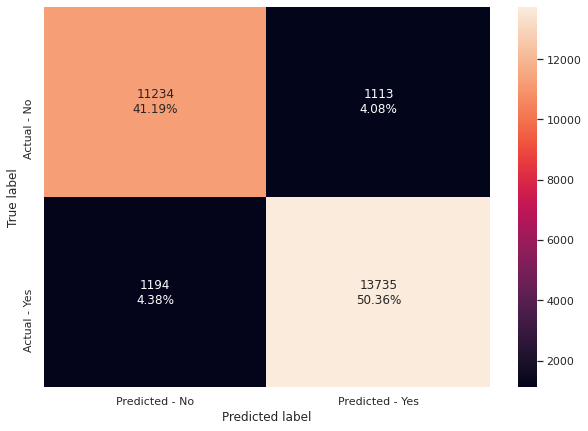

In [129]:
xgboost_score=get_metrics_score2(xgboost)


make_confusion_matrix(xgboost,y_test)

The untuned XGBoost didnt perform quiteas well as the previous models for all metrics. 

### !RandomSearchCV

In [130]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 1} with CV score=0.9929088903221664:
CPU times: user 19min 37s, sys: 2.23 s, total: 19min 40s
Wall time: 19min 33s


In [131]:
xgboost_tuned2=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,gamma=1, learning_rate=.01 ,n_estimators=200, scale_pos_weight=10, subsample=.9))
xgboost_tuned2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.7548435756823432
Accuracy on test set :  0.752676345505206
Recall on training set :  0.9920475424896646
Recall on test set :  0.9929667090896912
Precision on training set :  0.6927626303127506
Precision on test set :  0.6906126252038202


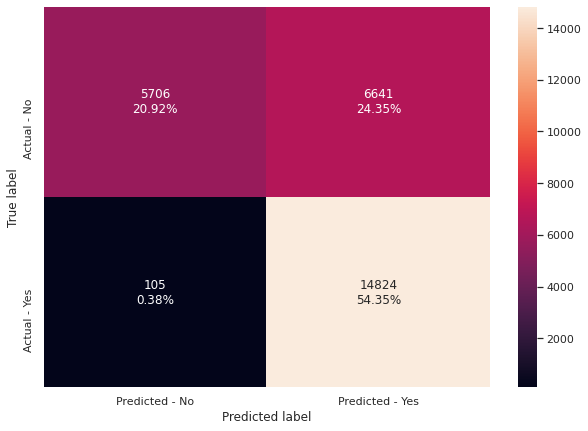

In [132]:
xgboost_score2=get_metrics_score2(xgboost_tuned2)


make_confusion_matrix(xgboost_tuned2,y_test)

Significant decrease in accuracy and precision.

### GridSearchCV

In [99]:
%%time

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 1} with CV score=0.9934543517384219:
CPU times: user 9h 49min 17s, sys: 56.6 s, total: 9h 50min 13s
Wall time: 9h 47min 21s


In [202]:
xgboost_tuned1=XGBClassifier(random_state=1,gamma=0, learning_rate=.01,n_estimators=200, scale_pos_weight=10, subsample=1)
xgboost_tuned1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy on training set :  0.7447714523656134
Accuracy on test set :  0.7426675465610794
Recall on training set :  0.9946026642168121
Recall on test set :  0.9945743184406189
Precision on training set :  0.6833270873192765
Precision on test set :  0.6815386027724226


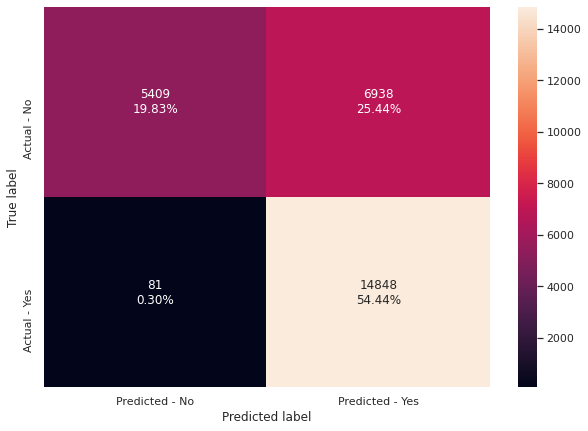

In [203]:
xgboost_score=get_metrics_score2(xgboost_tuned1)


make_confusion_matrix(xgboost_tuned1,y_test)

No improvement over previous algorithms. 

## ADABoost

In [204]:
adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

Accuracy on training set :  0.8958690152574598
Accuracy on test set :  0.8956225252969644
Recall on training set :  0.9027618282039503
Recall on test set :  0.8997253667358832
Precision on training set :  0.9065878621882658
Precision on test set :  0.9086727100527668


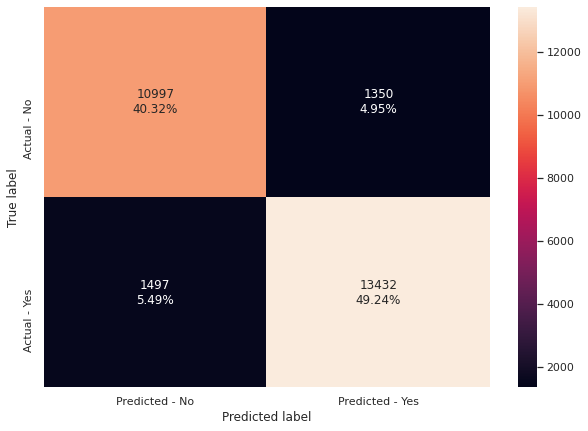

In [205]:
adaboost_score=get_metrics_score2(adaboost)
make_confusion_matrix(adaboost,y_test)

Better performance than XGBoost but not as good as Bagging or decision tree. 

### RandomSearchCV

In [99]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 70, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=0.9435578316563203:
CPU times: user 14min 45s, sys: 7.37 s, total: 14min 52s
Wall time: 14min 49s


In [100]:
ada_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=70,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
ada_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=3,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                      

Accuracy on training set :  0.9454125485143225
Accuracy on test set :  0.9373808476316176
Recall on training set :  0.9501033532384014
Recall on test set :  0.9415901935829594
Precision on training set :  0.9501579098478323
Precision on test set :  0.9438662458873296


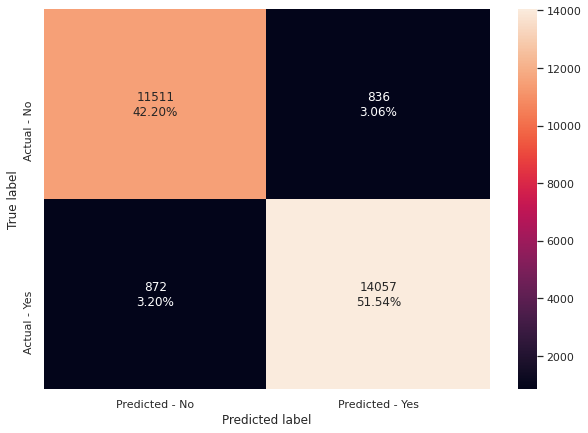

In [101]:
ada_tuned2_score=get_metrics_score2(ada_tuned2)
make_confusion_matrix(ada_tuned2,y_test)

ADABoost with RandomsearchCV tuning did improve over the untuned ADABoost.

## Gradient Boosting

In [102]:
gradboost=GradientBoostingClassifier(random_state=1)
gradboost.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on training set :  0.9222513788281139
Accuracy on test set :  0.9188664026983429
Recall on training set :  0.9289159393661002
Recall on test set :  0.9253801326277714
Precision on training set :  0.9290226254737568
Precision on test set :  0.9263108488668366


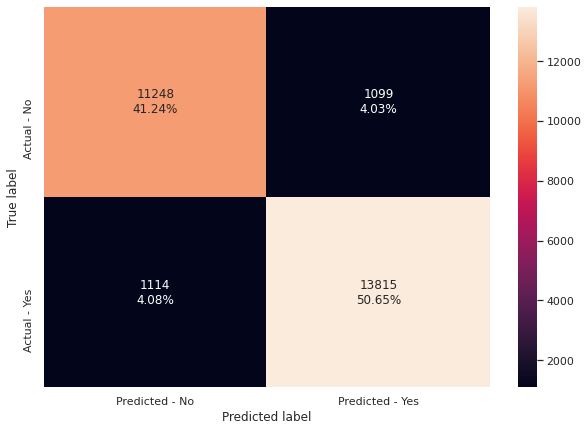

In [103]:
gradboost_score=get_metrics_score2(gradboost)
make_confusion_matrix(gradboost,y_test)

### RandomSearchCV

In [104]:
pipe =make_pipeline(GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))

# Grid of parameters to choose from
## add from article
param_grid = {
    "gradientboostingclassifier__n_estimators": [100,150,200,250],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best Parameters:{'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.8} 
Score: 0.9414045155495158


In [105]:
gradboost_tuned2=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1, max_features=.8, n_estimators=250, subsample=1))
gradboost_tuned2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=0.8,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=250,
                                            n_iter_no_c

Accuracy on training set :  0.9371631495419619
Accuracy on test set :  0.9349611379967737
Recall on training set :  0.9416915480018374
Recall on test set :  0.9389778283877018
Precision on training set :  0.9433978544105381
Precision on test set :  0.9420065855789261


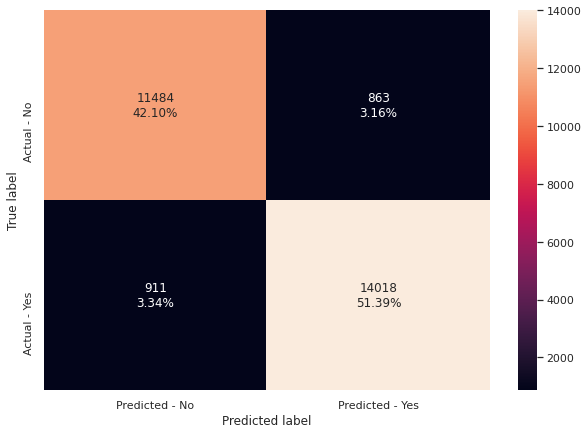

In [106]:
gradboost_tuned2_score=get_metrics_score2(gradboost_tuned2)
make_confusion_matrix(gradboost_tuned2,y_test)

Slight improvement over untuned GradBoost model. 

## Results

My best results were from the Bagging classifier/Random Forest and the ADABoost models. I will evaluate feature importance from these models. 

### Random Forest

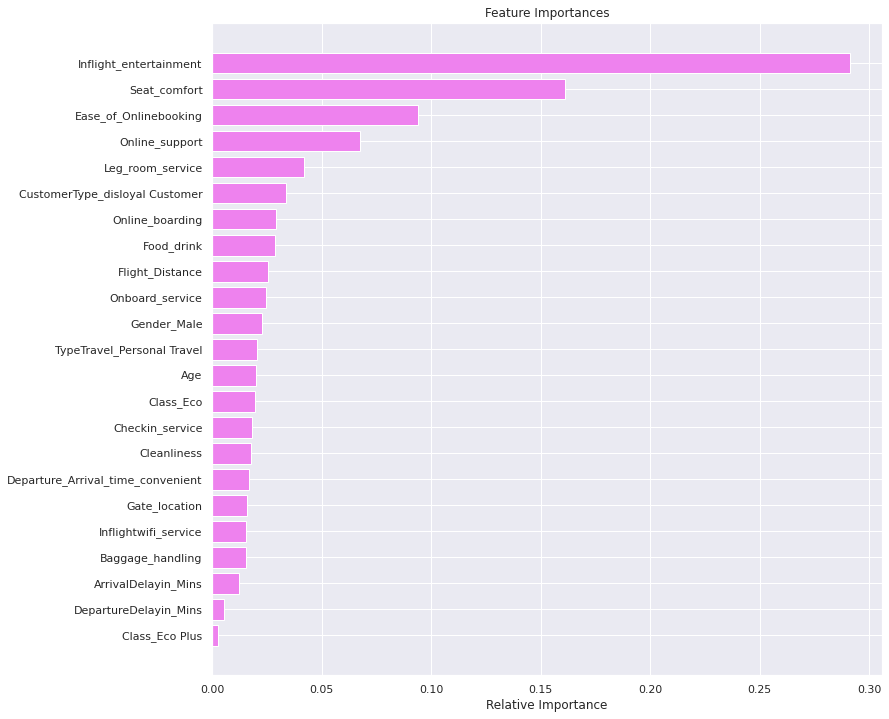

In [110]:
feature_names = X_train.columns
importances = rf_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### ADABoost

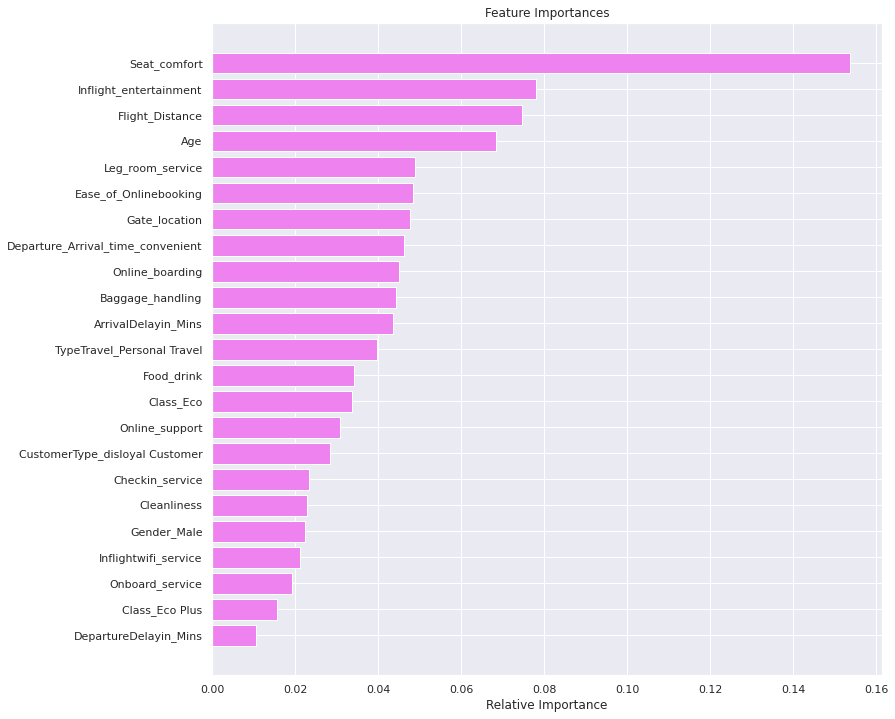

In [111]:
feature_names = X_train.columns
importances = ada_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### GradBoost

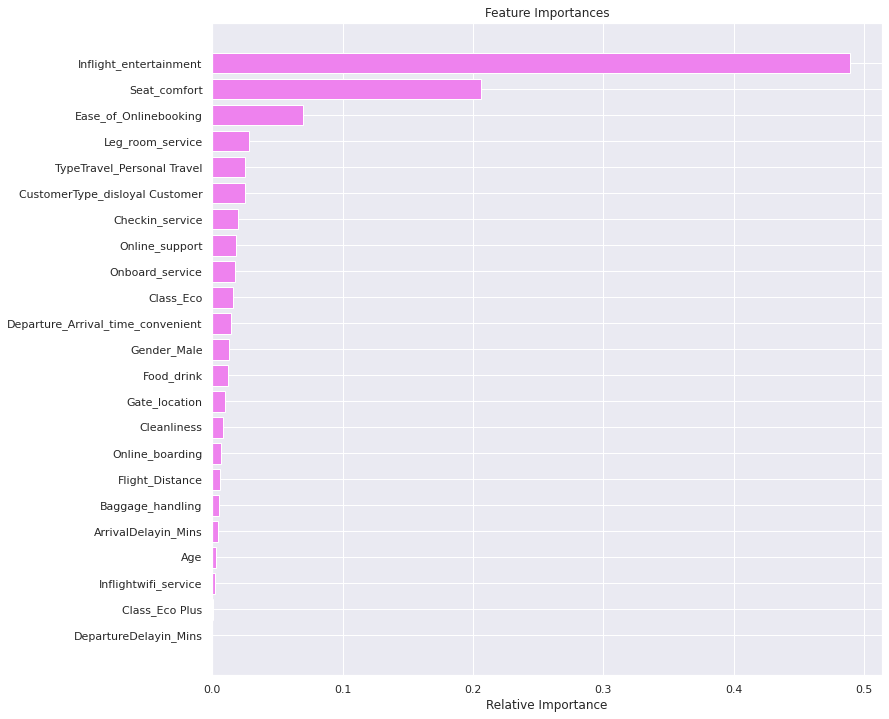

In [112]:
feature_names = X_train.columns
importances = gradboost_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()